## Import Packages

In [ ]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
import seaborn as sns
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from string import punctuation

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA - Sugars_100g

Sugar is highly related to heath problems such as over-weight, Diabetes and so on. That's why we would like to look into this nutrient and see if there is a difference in sugar level between organic and non-organic food.

We first explore the whole data and analyze the relationship between sugar_100g and organic_label

In [ ]:
# Read the saved cleaned data from Data Wrangling
df_cleaned = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CIS 5450/Project/cleaned_data_DW_z_score.csv")

In [ ]:
# Peek
df_cleaned.head()

product_name  \
0                     Peanuts   
1  Granola Cranberry And Acai   
2         Peanuts, Mixed Nuts   
3                 Cranberries   
4            Turkish Apricots   

                                    ingredients_text     serving_size  \
0  Peanuts, wheat flour, sugar, rice flour, tapio...  28 g (0.25 cup)   
1  Whole rolled oats, milled cane sugar, vegetabl...   55 g (0.5 cup)   
2  Peanuts, honey, coating (sucrose, wheat starch...  28 g (0.25 cup)   
3                 Cranberries, sugar, sunflower oil.  30 g (0.25 cup)   
4                          Apricots, sulfur dioxide.  40 g (7 PIECES)   

   additives_n                                          additives  \
0          0.0  [ peanuts ]  [ wheat-flour ]  [ flour ]  [ sug...   
1          0.0  [ whole-rolled-oats ]  [ rolled-oats ]  [ oats...   
2          1.0  [ peanuts ]  [ honey ]  [ coating ]  [ sucrose...   
3          0.0  [ cranberries ]  [ sugar ]  [ sunflower-oil ] ...   
4          1.0                   [ apricots ]  [ sulfur-dioxide ]   

             additives_en nutrition_grade_fr  energy_100g  fat_100g  \
0                     NaN                  b       1941.0     17.86   
1                     NaN                  c       1824.0     10.91   
2      E415 - Xanthan gum                  d       2389.0     42.86   
3                     NaN                  c       1255.0      0.00   
4  E220 - Sulphur dioxide                  c       1046.0      0.00   

   saturated_fat_100g  ...  proteins_100g  salt_100g  sodium_100g  \
0                0.00  ...          17.86    0.63500        0.250   
1                0.91  ...           9.09    0.25400        0.100   
2                7.14  ...          25.00    0.54356        0.214   
3                0.00  ...           0.00    0.00000        0.000   
4                0.00  ...           2.50    0.00000        0.000   

   vitamin_a_100g  vitamin_c_100g  calcium_100g  iron_100g  organic_label  \
0        0.000000             0.0         0.071    0.00129              0   
1        0.000000             0.0         0.036    0.00262              0   
2        0.000000             0.0         0.071    0.00514              0   
3        0.000000             0.0         0.000    0.00000              0   
4        0.001125             0.0         0.050    0.00360              0   

   nutrition_score_100g  nutrition_grade  
0                   0.0                4  
1                   6.0                3  
2                  14.0                2  
3                   8.0                3  
4                   8.0                3  

[5 rows x 25 columns]

In [ ]:
# Drop the 'serving_size' and 'additives' columns that we don't need anymore
df_cleaned.drop(columns=['serving_size', 'additives'], inplace=True)

In [ ]:
# Check the data info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91466 entries, 0 to 91465
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          91466 non-null  object 
 1   ingredients_text      91466 non-null  object 
 2   additives_n           91466 non-null  float64
 3   additives_en          62159 non-null  object 
 4   nutrition_grade_fr    91466 non-null  object 
 5   energy_100g           91466 non-null  float64
 6   fat_100g              91466 non-null  float64
 7   saturated_fat_100g    91466 non-null  float64
 8   trans_fat_100g        91466 non-null  float64
 9   cholesterol_100g      91466 non-null  float64
 10  carbohydrates_100g    91466 non-null  float64
 11  sugars_100g           91466 non-null  float64
 12  fiber_100g            91466 non-null  float64
 13  proteins_100g         91466 non-null  float64
 14  salt_100g             91466 non-null  float64
 15  sodium_100g        

Observation: all columns contain no NaN values except additives_en.

**Descriptive Analysis of Non-organic vs Organic sugars_100g data**

Get the statistic data of sugars_100g from Non-organic and organic products to compare them.

In [ ]:
# Separate organic and non-organic sugar data
organic_sugar = df_cleaned[df_cleaned['organic_label'] == 1]['sugars_100g']
non_organic_sugar = df_cleaned[df_cleaned['organic_label'] == 0]['sugars_100g']

In [ ]:
# Summary statistics
print("Descriptions for Non-organic vs organic sugars_100g:\n")
print("Non-organic sugars_100g:\n", non_organic_sugar.describe())
print("\nOrganic sugars_100g:\n", organic_sugar.describe())

Descriptions for Non-organic vs organic sugars_100g:

Non-organic sugars_100g:
 count    80036.000000
mean        15.097899
std         17.971502
min          0.000000
25%          1.880000
50%          6.350000
75%         24.620000
max         72.730000
Name: sugars_100g, dtype: float64

Organic sugars_100g:
 count    11430.000000
mean        11.946962
std         14.247739
min          0.000000
25%          2.000000
50%          5.630000
75%         18.750000
max         72.500000
Name: sugars_100g, dtype: float64


Observation: the average sugar level per 100g in non-organic products (15.097899g) is higher than in organic products (11.946962g). The median is also higher in non-organic products (6.350000g vs 5.630000g). From this data set, it shows that in general the non-organic products contains more sugar than organic products on average.

**Boxplot Comparison of Non-organic vs Organic sugars_100g data**

Visualize the comparison.

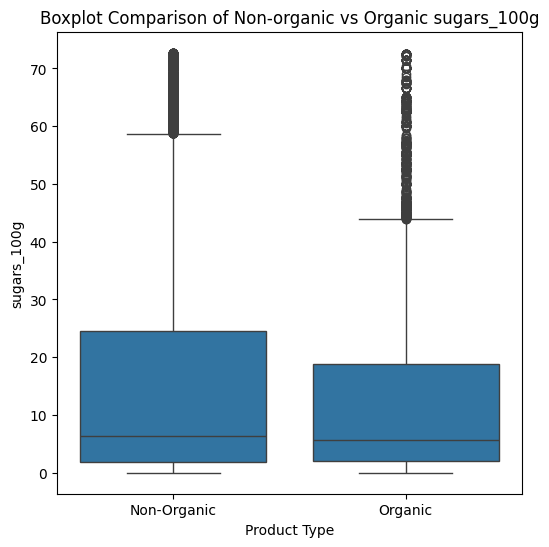

In [ ]:
# Boxplot comparison of Non-organic and organic sugars_100g
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_cleaned, x='organic_label', y='sugars_100g')
plt.xticks([0, 1], ['Non-Organic', 'Organic'])
plt.xlabel('Product Type')
plt.ylabel('sugars_100g')
plt.title('Boxplot Comparison of Non-organic vs Organic sugars_100g')
plt.show()

Observation: due to the imbalance between the two data, the range of sugars_100g from non-organic data is larger than that from organic data.

**Correlation Matrix for Nutrients and Organic Label**

We would like to find out the relationship between organic label and the nutrients through the correlation matrix. To see if there is any strong connection among the data. Also, this is a pre-check for the machine learning step.

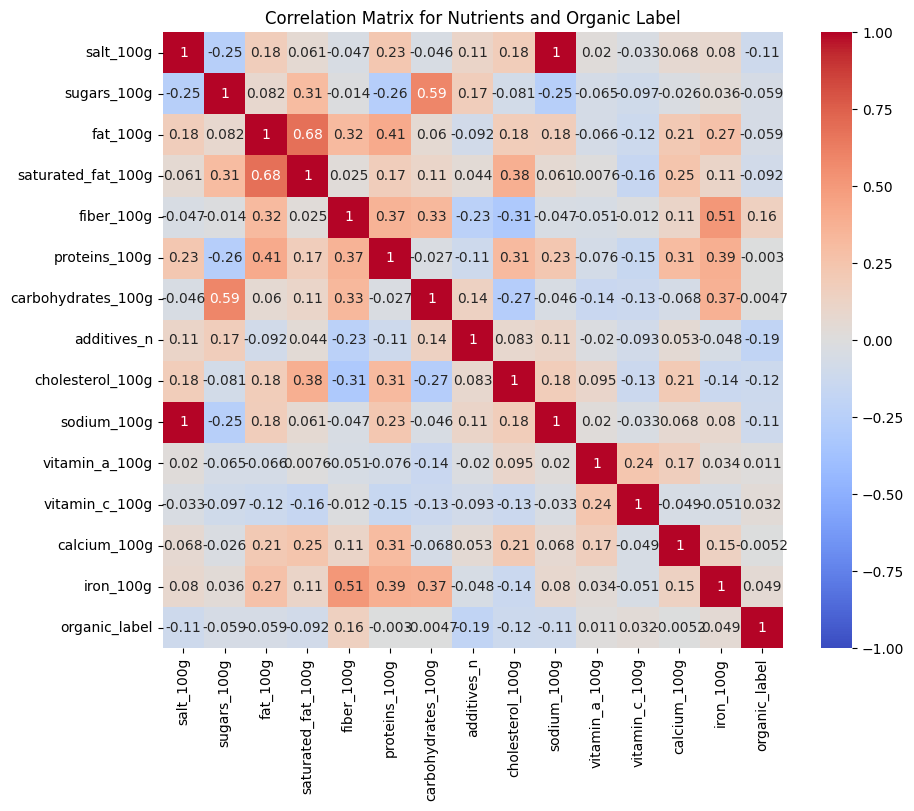

In [ ]:
# Select nutrient columns and organic label for correlation matrix
nutrient_cols = ['salt_100g', 'sugars_100g', 'fat_100g', 'saturated_fat_100g',
                 'fiber_100g', 'proteins_100g', 'carbohydrates_100g',
                 'additives_n', 'cholesterol_100g', 'sodium_100g',
                 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g',
                 'iron_100g', 'organic_label']

nutrient_df = df_cleaned[nutrient_cols]

# Plot correlation heatmap
corr_matrix = nutrient_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Nutrients and Organic Label")
plt.show()

Observation: the correlation matrix shows a very low negative correlation between sugar_100g and organic_label (-0.059). The relationship is very week.

Although fiber_100g(0.16), additives_n(-0.19), cholesterol_100g(-0.12), and sodium_100g(-0.11) show stronger connection to organic_label, the numbers are still low.

Some of the nutrients show strong correlation among each other, such as fiber_100g vs fat_100g(0.32), protein_100g(0.37), and iron_100g(0.51). Among the strong correlations, one reason is some nutrients contain each other, such as carbonhydrates includes sugars and fiber, and fat includes saturated_fat.

## EDA of Sugars_100g with Group Label

While we were working on the EDA of Salt, Fat and Sugar, we found that the correlation between organic_label and the nutrients are very week. One reason could be significant imbalance between non-organic and organic data (80036 rows vs. 11430 rows). This imbalance could lead to biased results.  Another reason could be the general comparison between non-organic and organic products lacks correspondence. For example, we could be comparing olive oil, milk, and candy in non-organic data to bread, juice in organic data. To make the comparison and correlation more corresponding, we decided to group similar non-organic and organic products and then run analysis by groups to see if the results would be different.

We will label similar products with same group id by finding string similarity in the fields of 'product_name' and 'ingredients_text'.

### Preparation for Group Labeling

In [ ]:
# Check the data sorted by 'product_name' and 'ingredients_text'
df_EDA = df_cleaned.sort_values(by=['product_name', 'ingredients_text'], ascending=True)
df_EDA.head()

product_name  \
80439                     !, Chocolate Gems   
85853                 !, Fresh Soda, Ginger   
80435                      !, Gummie Flower   
70773  !, Halloween Mix Whole Wheat Cookies   
80437    !, Happy Birthday Sour Jelly Beans   

                                        ingredients_text  additives_n  \
80439  Milk chocolate [sugar, cocoa butter, whole mil...          4.0   
85853  Sparkling filtered water, wisconsin honey, fre...          0.0   
80435  Corn syrup, sugar, gelatin, citric acid, sorbi...          7.0   
70773  Sugar, butter (milk, salt), organic wheat flou...          3.0   
80437  Sugar, corn syrup, corn starch, modified corn ...          9.0   

                                            additives_en nutrition_grade_fr  \
80439  E171 - Titanium dioxide,E322 - Lecithins,E322i...                  e   
85853                                                NaN                  b   
80435  E102 - Tartrazine,E110 - Sunset yellow FCF,E12...                  d   
70773  E101 - Riboflavin,E101i - Riboflavin,E1510 - E...                  e   
80437  E102 - Tartrazine,E110 - Sunset yellow FCF,E12...                  d   

       energy_100g  fat_100g  saturated_fat_100g  trans_fat_100g  \
80439       1891.0     21.43               14.29             0.0   
85853        163.0      0.00                0.00             0.0   
80435       1255.0      0.00                0.00             0.0   
70773       2301.0     30.00               20.00             0.0   
80437       1531.0      0.00                0.00             0.0   

       cholesterol_100g  ...  proteins_100g  salt_100g  sodium_100g  \
80439             0.012  ...           4.76    0.12192        0.048   
85853             0.000  ...           0.00    0.01016        0.004   
80435             0.000  ...           5.00    0.06350        0.025   
70773             0.090  ...           5.00    0.82550        0.325   
80437             0.000  ...           0.00    0.03048        0.012   

       vitamin_a_100g  vitamin_c_100g  calcium_100g  iron_100g  organic_label  \
80439        0.000071          0.0000         0.143    0.00086              0   
85853        0.000000          0.0014         0.006    0.00010              1   
80435        0.000000          0.0000         0.000    0.00000              0   
70773        0.000300          0.0000         0.100    0.00270              1   
80437        0.000000          0.0000         0.000    0.00000              0   

       nutrition_score_100g  nutrition_grade  
80439                  25.0                1  
85853                   2.0                4  
80435                  13.0                2  
70773                  19.0                1  
80437                  14.0                2  

[5 rows x 23 columns]

Observation: there are still some symbols in the product_name field. We need to remove them.

In [ ]:
# Notice that there are still some symbols in the product_name. Remove them.
df_EDA['product_name'] = df_EDA['product_name'].apply(lambda x: x.lower().lstrip('!,&').rstrip(',.').strip())
df_EDA = df_EDA.sort_values(by=['product_name', 'ingredients_text'], ascending=True).reset_index(drop=True)
df_EDA.head()

product_name  \
0     0% milkfat non-fat drinkable yogurt, raspberry   
1       0% milkfat non-fat drinkable yogurt, vanilla   
2      0% milkfat strained non-fat yogurt, blueberry   
3  0% milkfat strained non-fat yogurt, mixed berr...   
4          0% milkfat strained non-fat yogurt, peach   

                                    ingredients_text  additives_n  \
0  Pasteurized skim milk, cane sugar, raspberry, ...          1.0   
1  Pasteurized skim milk, organic agave nectar, m...          0.0   
2  Pasteurized skim milk, cane sugar, blueberries...          1.0   
3  Pasteurized skim milk, berries (black berries,...          1.0   
4  Pasteurized skim milk, peaches, cane sugar, fr...          1.0   

                    additives_en nutrition_grade_fr  energy_100g  fat_100g  \
0  E440 - Pectins,E440i - Pectin                  a        209.0       0.0   
1                            NaN                  a        192.0       0.0   
2  E440 - Pectins,E440i - Pectin                  a        305.0       0.0   
3  E440 - Pectins,E440i - Pectin                  a        305.0       0.0   
4  E440 - Pectins,E440i - Pectin                  a        280.0       0.0   

   saturated_fat_100g  trans_fat_100g  cholesterol_100g  ...  proteins_100g  \
0                 0.0             0.0               0.0  ...           3.33   
1                 0.0             0.0               0.0  ...           3.33   
2                 0.0             0.0               0.0  ...           9.33   
3                 0.0             0.0               0.0  ...           9.33   
4                 0.0             0.0               0.0  ...           9.33   

   salt_100g  sodium_100g  vitamin_a_100g  vitamin_c_100g  calcium_100g  \
0    0.11684        0.046             0.0             0.0         0.146   
1    0.12700        0.050             0.0             0.0         0.146   
2    0.09398        0.037             0.0             0.0         0.133   
3    0.09398        0.037             0.0             0.0         0.133   
4    0.09398        0.037             0.0             0.0         0.133   

   iron_100g  organic_label  nutrition_score_100g  nutrition_grade  
0        0.0              0                  -1.0                5  
1        0.0              1                  -1.0                5  
2        0.0              0                  -4.0                5  
3        0.0              0                  -4.0                5  
4        0.0              0                  -4.0                5  

[5 rows x 23 columns]

**Removing 'organic' and 'org' words in organic data**

To compare the the 'product_name' and 'ingredients_text' fields between non-organic and organic data, we need to remove the word 'organic' in both columns and 'org' in the 'ingredients_text' column of the organic data.

In [ ]:
# Check the 'product_name' and 'ingredients_text' columns of organic data
df_EDA[df_EDA['organic_label']==1][['product_name','ingredients_text']].head(10)

product_name  \
1         0% milkfat non-fat drinkable yogurt, vanilla   
5    0% milkfat strained non-fat yogurt, pomegranat...   
18                                 1 to 1 baking flour   
28                                     1% low fat milk   
57                                     1% low fat milk   
101                                     1% lowfat milk   
118                          1% lowfat milk, chocolate   
143                             1% milkfat lowfat milk   
144                             1% milkfat lowfat milk   
149        1% organic chocolate lowfat milk, chocolate   

                                      ingredients_text  
1    Pasteurized skim milk, organic agave nectar, m...  
5    Pasteurized skim milk, organic agave nectar, p...  
18   Sweet white rice flour, whole grain brown rice...  
28   Certified organic grade a low fat milk, certif...  
57   Organic grade a lowfat milk, vitamin a palmita...  
101  Organic grade a lowfat milk, vitamin a palmita...  
118  Organic grade a nonfat milk, organic cane suga...  
143  Organic grade a low fat milk, vitamins a & d a...  
144  Organic grade a lowfat milk, vitamin a palmita...  
149  Organic grade a lowfat milk, organic cane suga...

Remove key words and symbols. Lower case strings in both fields.

In [ ]:
# To compare the non-organic data and organic data with 'product_name' and 'ingredients_text' fields, we need to remove the word 'organic' in both columns and 'org' in 'ingredients_text' column.
# We also need to remove some symbols that affect the comparisons and lower case both fields.
df_EDA['product_name'] = df_EDA['product_name'].apply(lambda x: x.lower().replace('organic', '').strip())
df_EDA['product_name'] = df_EDA['product_name'].str.replace('[-(){}&|_*\\[\\]]', '', regex=True)
df_EDA['ingredients_text'] = df_EDA['ingredients_text'].apply(lambda x: x.lower().replace('organic', '').strip())
df_EDA['ingredients_text'] = df_EDA['ingredients_text'].apply(lambda x: x.replace('org', '').strip())
df_EDA['ingredients_text'] = df_EDA['ingredients_text'].str.replace('[(){}&|_*\\[\\]]', '', regex=True)
df_EDA['ingredients_text'] = df_EDA['ingredients_text'].str.strip()

In [ ]:
# Check organic data again.
df_EDA[df_EDA['organic_label']==1][['product_name','ingredients_text']].head(10)

product_name  \
1          0% milkfat nonfat drinkable yogurt, vanilla   
5    0% milkfat strained nonfat yogurt, pomegranate...   
18                                 1 to 1 baking flour   
28                                     1% low fat milk   
57                                     1% low fat milk   
101                                     1% lowfat milk   
118                          1% lowfat milk, chocolate   
143                             1% milkfat lowfat milk   
144                             1% milkfat lowfat milk   
149               1%  chocolate lowfat milk, chocolate   

                                      ingredients_text  
1    pasteurized skim milk,  agave nectar, madagasc...  
5    pasteurized skim milk,  agave nectar, passion ...  
18   sweet white rice flour, whole grain brown rice...  
28   certified  grade a low fat milk, certified  no...  
57   grade a lowfat milk, vitamin a palmitate, vita...  
101  grade a lowfat milk, vitamin a palmitate, vita...  
118  grade a nonfat milk,  cane sugar,  nonfat dry ...  
143         grade a low fat milk, vitamins a  d added.  
144  grade a lowfat milk, vitamin a palmitate, vita...  
149  grade a lowfat milk,  cane sugar,  cocoa proce...

Now we have clean data to begin with.

###Group labeling similar products using fuzz.token_set_ratio

You can find Fuzz string matching introduction in [here](https://www.analyticsvidhya.com/blog/2021/07/fuzzy-string-matching-a-hands-on-guide/#h-what-is-fuzzy-string-matching-0).

Compare strings of product_name and ingredients_text.

First find group label for organic products by comparing products within organic dataset with thresholds of product_name 50(%) and ingredients_text 70(%). Defined function: group_similar_strings_1

Then compare non-organic products in non-organic dataset with group labeled organic products in organic dataset with thresholds of product_name 50(%) and ingredients_text 70(%). Defined function: group_similar_strings_2

Because of the limited processing capacity of colab, the non-organic dataset, total 80036 rows, are divided into 17 batches to run seperately. Then combine all the datasets back into one group-labeled dataset.

In [ ]:
# Install and import packages.
!pip install thefuzz

from thefuzz import fuzz
from thefuzz import process

In [ ]:
#UDF: group label similar products within one dataframe by comparing both column1 with threshold1 and column2 with threshold2.
def group_similar_strings_1(df, column1, column2, threshold1, threshold2):
    df['group_id'] = 0
    group_counter = 1
    for i, row in df.iterrows():
        if df.at[i, 'group_id'] == 0:
            df.at[i, 'group_id'] = group_counter
            for j, other_row in df.iterrows():
                if i != j and fuzz.token_set_ratio(row[column1], other_row[column1]) >= threshold1 and fuzz.token_sort_ratio(row[column2], other_row[column2]) >= threshold2:  # Adjust threshold as needed
                    df.at[j, 'group_id'] = group_counter
            group_counter += 1
    return df

In [ ]:
#UDF: group label similar products between two dataframes. df2 is already group labeled. Compare df1's column1 with threshold1 and column2 with threshold2 to df2's and group label df1's data.
def group_similar_strings_2(df1, df2, column1, column2, threshold1, threshold2):
    for i, row in df1.iterrows():
        for j, other_row in df2.iterrows():
            if fuzz.token_set_ratio(other_row[column1], row[column1]) >= threshold1 and fuzz.token_sort_ratio(other_row[column2], row[column2]) >= threshold2:  # Adjust threshold as needed
                df1.at[i, 'group_id'] = df2.at[j, 'group_id']
                break
    return df1

In [ ]:
# Get the organic products dataframe
df_EDA_organic = df_EDA[df_EDA['organic_label']==1].reset_index(drop=True)

In [ ]:
# Get the non-organic products dataframe
df_EDA_non_organic = df_EDA[df_EDA['organic_label']==0].reset_index(drop=True)

In [ ]:
# Use the function of group_similar_strings_1 to group label the organic dataframe. Set 50% threshold for 'product_name' and 70% threshold for 'ingredients_text'.
df_EDA_organic = group_similar_strings_1(df_EDA_organic, 'product_name', 'ingredients_text', 50, 70)

In [ ]:
# Save the group labeled organic dataframe to a csv file to use later
df_EDA_organic.to_csv('/content/drive/My Drive/df_EDA_organic_group_Fuzz_5070.csv', index=True)

In [ ]:
# Load the data if colab lose connection while running long time
# df_EDA_organic = pd.read_csv("/content/drive/MyDrive/df_EDA_organic_group_Fuzz_5070.csv")

In [ ]:
# Create the group_id column for non-organic dataframe and initiate all value to 0
df_EDA_non_organic['group_id'] = 0

In [ ]:
# Reset index in non-organic dataframe
df_EDA_non_organic.reset_index(drop=True)

In [ ]:
# Reset index in group labeled organic dataframe
df_EDA_organic.reset_index(drop=False, inplace=True)

In [ ]:
# Only include 'product_name' and 'ingredients_text and 'group_id' in the group labeled organic dataframe for comparing and group labeling. Sort dataframe by 'group_id' and reset index.
df_EDA_organic_compare = df_EDA_organic[['product_name', 'ingredients_text', 'group_id']].sort_values(by=['group_id'], ascending=False).reset_index(drop=True)

Since colab loose connection after a long run, we can not finish the labeling in one run (more than 16 hours due to O(n^2) time complexity). We divided the non-organic dataframe into 17 batches to run one by one.

In [ ]:
df_non_organic_compare_1 = df_EDA_non_organic.head(5000)

In [ ]:
df_non_organic_compare_2 = df_EDA_non_organic.iloc[5000:10000]

In [ ]:
df_non_organic_compare_3 = df_EDA_non_organic.iloc[10000:15000]

In [ ]:
df_non_organic_compare_4 = df_EDA_non_organic.iloc[15000:20000]

In [ ]:
df_non_organic_compare_5 = df_EDA_non_organic.iloc[20000:25000]

In [ ]:
df_non_organic_compare_6 = df_EDA_non_organic.iloc[25000:30000]

In [ ]:
df_non_organic_compare_7 = df_EDA_non_organic.iloc[30000:35000]

In [ ]:
df_non_organic_compare_8 = df_EDA_non_organic.iloc[35000:40000]

In [ ]:
df_non_organic_compare_9 = df_EDA_non_organic.iloc[40000:45000]

In [ ]:
df_non_organic_compare_10 = df_EDA_non_organic.iloc[45000:50000]

In [ ]:
df_non_organic_compare_11 = df_EDA_non_organic.iloc[50000:55000]

In [ ]:
df_non_organic_compare_12 = df_EDA_non_organic.iloc[55000:60000]

In [ ]:
df_non_organic_compare_13 = df_EDA_non_organic.iloc[60000:65000]

In [ ]:
df_non_organic_compare_14 = df_EDA_non_organic.iloc[65000:70000]

In [ ]:
df_non_organic_compare_15 = df_EDA_non_organic.iloc[70000:75000]

In [ ]:
df_non_organic_compare_16 = df_EDA_non_organic.iloc[75000:77500]

In [ ]:
df_non_organic_compare_17 = df_EDA_non_organic.iloc[77500:81000]

In [ ]:
# Apply the group_similar_string_2 function to group label non-organic data by comparing with the group labeled organic data. Set 50% threshold for 'product_name' and 70% threshold for 'ingredients_text'.
df_non_organic_compare_batch = group_similar_strings_2(df_non_organic_compare_17, df_EDA_organic_compare, 'product_name', 'ingredients_text', 50, 70)

In [ ]:
# Save the batch of group labeled non-ogranic data to a csv file, rename the file in drive according to the batch number for later combination
df_non_organic_compare_batch.to_csv('/content/drive/My Drive/df_non_organic_compare_batch_17.csv', index=True)

In [ ]:
# Load the group labeled organic data from drive if needed
#df_EDA_organic = pd.read_csv("/content/drive/MyDrive/df_EDA_organic_5070.csv")

In [ ]:
#Put all batches of data into a list to concatenate all the batches of group labeled non-organic data and organic data
frames = []

for i in range(1,18):
  frames.append(pd.read_csv(f"/content/drive/MyDrive/df_non_organic_compare_batch_{i}.csv"))

frames.append(df_EDA_organic)

df_EDA_group = pd.concat(frames)

In [ ]:
# Sort dataframe by 'group_id'
df_EDA_group.sort_values(by=['group_id'], inplace=True)
# Reset index
df_EDA_group.reset_index(drop=True, inplace=True)
# Drop the column 'Unnamed: 0'
df_EDA_group.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Save the dataframe to csv file in drive
df_EDA_group.to_csv('/content/drive/My Drive/df_EDA_group_Fuzz.csv', index=False)

###Group labeling similar products using Jaccard Similarity
Convert product_name and ingredients_text into sets of tokens. Then compare the sets using Jaccard Similarity.

First find group label for organic products by comparing products within organic dataset with thresholds of product_name 0.4 and ingredients_text 0.5. Defined function: group_similar_strings_J

Then compare non-organic products in non-organic dataset with group labeled organic products in organic dataset with thresholds of product_name 0.4 and ingredients_text 0.5. Defined function: group_similar_strings_J_2

Because of the limited processing capacity of colab, the non-organic dataset, total 80036 rows, are divided into 9 batches to run seperately. Then combine all the datasets back into one group-labeled dataset.

In [ ]:
# UDF: Helper function to covert string fields into sets of tokens without punctuations
def convert_to_set(s):
    words = nltk.word_tokenize(s)
    words = [word.lower() for word in words if word not in string.punctuation]
    return set(words)

In [ ]:
# UDF: Helper function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

In [ ]:
# UDF: group labeling similar products within one dataframe by comparing 'product_name' and 'ingredients_text' using Jaccard similarity.
def group_similar_strings_J(df, column1, column2, threshold1, threshold2):
    df['group_id'] = 0
    group_counter = 1
    for i, row in df.iterrows():
        if df.at[i, 'group_id'] == 0:
            df.at[i, 'group_id'] = group_counter
            for j, other_row in df.iterrows():
                if i != j and jaccard_similarity(row[column1], other_row[column1]) >= threshold1 and jaccard_similarity(row[column2], other_row[column2]) >= threshold2:  # Adjust threshold as needed
                    df.at[j, 'group_id'] = group_counter
            group_counter += 1
    return df

In [ ]:
# UDF: df2 is already group labeled. Group label similar products between two dataframes by comparing 'product_name' and 'ingredients_text' using Jaccard similarity.
def group_similar_strings_J_2(df1, df2, column1, column2, threshold1, threshold2):
    for i, row in df1.iterrows():
        for j, other_row in df2.iterrows():
            if jaccard_similarity(other_row[column1], row[column1]) >= threshold1 and jaccard_similarity(other_row[column2], row[column2]) >= threshold2:  # Adjust threshold as needed
                df1.at[i, 'group_id'] = df2.at[j, 'group_id']
                break
    return df1

In [ ]:
# Convert the 'product_name' and 'ingredients_text' columns into sets of tokens
df_EDA['product_name_set'] = df_EDA['product_name'].apply(convert_to_set)
df_EDA['ingredients_text_set'] = df_EDA['ingredients_text'].apply(convert_to_set)

In [ ]:
# Get the organic dataframe
df_EDA_organic_s = df_EDA[df_EDA['organic_label']==1]

In [ ]:
# Use the function of group_similar_strings_J to group label the organic dataframe. Set 40% threshold for 'product_name' and 50% threshold for 'ingredients_text'.
df_EDA_organic_group_J = group_similar_strings_J(df_EDA_organic_s, 'product_name_set', 'ingredients_text_set', 0.4, 0.5)

In [ ]:
# Save the group labeled organic dataframe to a csv file to use later
df_EDA_organic_group_J.to_csv('/content/drive/My Drive/df_EDA_organic_group_Jaccard_4050.csv', index=False)

In [ ]:
# Get the non-organic dataframe
df_EDA_non_organic_s = df_EDA[df_EDA['organic_label']==0]

In [ ]:
# Create the column 'group_id' in non-organic dataframe and initiate the values to 0
df_EDA_non_organic_s['group_id'] = 0

In [ ]:
# Reset the index in non-organic data
df_EDA_non_organic_s.reset_index(drop=True, inplace=True)

In [ ]:
# Load the saved group labeled organic data if needed
#df_EDA_organic_group_J = pd.read_csv("/content/drive/MyDrive/df_EDA_organic_group_Jaccard_4050.csv")

# When saving the organic data, the sets of tokens became strings, need to convert the strings back to sets of tokens
#df_EDA_organic_group_J['product_name_set'] = df_EDA_organic_group_J['product_name'].apply(convert_to_set)
#df_EDA_organic_group_J['ingredients_text_set'] = df_EDA_organic_group_J['ingredients_text'].apply(convert_to_set)

In [ ]:
# Only include 'product_name' and 'ingredients_text and 'group_id' in the group labeled organic dataframe for comparing and group labeling. Sort dataframe by 'group_id' and reset index.
df_EDA_organic_compare = df_EDA_organic_group_J[['product_name_set', 'ingredients_text_set', 'group_id']].sort_values(by=['group_id'], ascending=True).reset_index(drop=True)

Since colab loose connection after a long run, we can not finish the labeling in one run (more than 16 hours due to O(n^2) time complexity). We divided the non-organic dataframe into 9 batches to run one by one.

In [ ]:
# Mannually divided the non-orgnaic data into 9 batches
df_non_organic_compare_9 = df_EDA_non_organic_s.iloc[75000:81000]

In [ ]:
# Apply the group_similar_string_J_2 function to group label non-organic data by comparing with the group labeled organic data. Set 30% threshold for 'product_name' and 40% threshold for 'ingredients_text'.
df_non_organic_compare_batch = group_similar_strings_J_2(df_non_organic_compare_9, df_EDA_organic_compare, 'product_name_set', 'ingredients_text_set', 0.3, 0.4)

In [ ]:
# Save the batch of group labeled non-ogranic data to a csv file, rename the file in drive according to the batch number for later combination
df_non_organic_compare_batch.to_csv('/content/drive/My Drive/df_non_organic_batch_J_9.csv', index=True)

In [ ]:
# Put all batches of data into a list to concatenate all the batches of group labeled non-organic data and organic data
frames = []

for i in range(1,10):
  frames.append(pd.read_csv(f"/content/drive/MyDrive/df_non_organic_batch_J_{i}.csv"))

# Load the group labeled organic data from drive if needed
#df_EDA_organic_group_J = pd.read_csv("/content/drive/MyDrive/df_EDA_organic_group_Jaccard_4050.csv")

frames.append(df_EDA_organic_group_J)

df_EDA_group = pd.concat(frames)

In [ ]:
# Sort dataframe by 'group_id'
df_EDA_group.sort_values(by=['group_id'], inplace=True)
# Reset index
df_EDA_group.reset_index(drop=True, inplace=True)
# Drop the intermediet columns
df_EDA_group.drop(columns=['Unnamed: 0', 'product_name_set', 'ingredients_text_set'], inplace=True)

In [ ]:
# Check the dataframe info
df_EDA_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91466 entries, 0 to 91465
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          91466 non-null  object 
 1   ingredients_text      91466 non-null  object 
 2   additives_n           91466 non-null  float64
 3   additives_en          62159 non-null  object 
 4   nutrition_grade_fr    91466 non-null  object 
 5   energy_100g           91466 non-null  float64
 6   fat_100g              91466 non-null  float64
 7   saturated_fat_100g    91466 non-null  float64
 8   trans_fat_100g        91466 non-null  float64
 9   cholesterol_100g      91466 non-null  float64
 10  carbohydrates_100g    91466 non-null  float64
 11  sugars_100g           91466 non-null  float64
 12  fiber_100g            91466 non-null  float64
 13  proteins_100g         91466 non-null  float64
 14  salt_100g             91466 non-null  float64
 15  sodium_100g        

In [ ]:
# Save the dataframe to use later
df_EDA_group.to_csv('/content/drive/My Drive/df_EDA_group_Jaccard.csv', index=False)

###EDA with Fuzz grouping dataset

**Prepare data**

In [ ]:
# Load the group labeded data by Fuzz function if needed
df_EDA_group = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CIS 5450/Project/df_EDA_group_Fuzz.csv")

In [ ]:
# Peek
df_EDA_group.head()

product_name  \
0     honey mustard dressing   
1  chocolate covered raisins   
2  chocolate covered raisins   
3  chocolate covered raisins   
4  chocolate covered raisins   

                                    ingredients_text  additives_n  \
0  vegetable oil soybean and/or canola, high fruc...          2.0   
1  ingredients- milk chocolate, sugar, cocoa butt...          2.0   
2  milk chocolate sugar cocoa butter, milk, choco...          1.0   
3  milk chocolate sugar, cocoa butter, milk, choc...          4.0   
4  milk chocolate sugar, cocoa butter, milk, choc...          4.0   

                                        additives_en nutrition_grade_fr  \
0       E330 - Citric acid,E334 - L(+)-tartaric acid                  e   
1  E322 - Lecithins,E322i - Lecithin,E414 - Acaci...                  d   
2                  E322 - Lecithins,E322i - Lecithin                  e   
3  E14XX - Modified Starch,E322 - Lecithins,E322i...                  e   
4  E14XX - Modified Starch,E322 - Lecithins,E322i...                  e   

   energy_100g  fat_100g  saturated_fat_100g  trans_fat_100g  \
0       1812.0     36.67                6.67             0.0   
1       1941.0     21.43               14.29             0.0   
2       1778.0     17.50               10.00             0.0   
3       1883.0     15.00               10.00             0.0   
4       1674.0     15.00                8.75             0.0   

   cholesterol_100g  ...  salt_100g  sodium_100g  vitamin_a_100g  \
0             0.050  ...    1.77800        0.700             0.0   
1             0.000  ...    0.13716        0.054             0.0   
2             0.012  ...    0.09652        0.038             0.0   
3             0.000  ...    0.09652        0.038             0.0   
4             0.012  ...    0.12700        0.050             0.0   

   vitamin_c_100g  calcium_100g  iron_100g  organic_label  \
0             0.0         0.000    0.00000              0   
1             0.0         0.071    0.00129              0   
2             0.0         0.100    0.00180              0   
3             0.0         0.050    0.00270              0   
4             0.0         0.100    0.00090              0   

   nutrition_score_100g  nutrition_grade  group_id  
0                  22.0                1         0  
1                  14.0                2         0  
2                  21.0                1         0  
3                  21.0                1         0  
4                  19.0                1         0  

[5 rows x 24 columns]

In [ ]:
# if group_id is 0, it means the non-organic product did not find a group match in the organic product. Thus, we will remove them. Sort value by 'group_id' and reset index.
df_EDA = df_EDA_group[df_EDA_group['group_id']!=0].sort_values(by='group_id').reset_index()

In [ ]:
# Although we have removed non-organic data which did not find a group match, we still need to remove groups with only organic data. We first group the data by group_id. Then find out the groups with only one kind of data, which is organic. Filter out these groups.
df_EDA_filter = df_EDA.groupby('group_id')[['group_id','organic_label']]
df_filter = df_EDA_filter.filter(lambda x: len(x['organic_label'].unique()) > 1)
# Find the list of group_id with 2 kinds of data (non-organic and organic). Then use it to filter the data.
group_lst = df_filter['group_id'].unique().tolist()
df_EDA_clean = df_EDA[df_EDA['group_id'].isin(group_lst)].reset_index(drop=True)

In [ ]:
# Now we have 34320 rows of data left. Each group data contains similar products of both non-organic and organic.
df_EDA_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34320 entries, 0 to 34319
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 34320 non-null  int64  
 1   product_name          34320 non-null  object 
 2   ingredients_text      34320 non-null  object 
 3   additives_n           34320 non-null  float64
 4   additives_en          20018 non-null  object 
 5   nutrition_grade_fr    34320 non-null  object 
 6   energy_100g           34320 non-null  float64
 7   fat_100g              34320 non-null  float64
 8   saturated_fat_100g    34320 non-null  float64
 9   trans_fat_100g        34320 non-null  float64
 10  cholesterol_100g      34320 non-null  float64
 11  carbohydrates_100g    34320 non-null  float64
 12  sugars_100g           34320 non-null  float64
 13  fiber_100g            34320 non-null  float64
 14  proteins_100g         34320 non-null  float64
 15  salt_100g          

**Descriptive Analysis of Non-organic vs Organic sugars_100g data**

In [ ]:
# Separate organic and non-organic sugar data
organic_sugar = df_EDA_clean[df_EDA_clean['organic_label'] == 1]['sugars_100g']
non_organic_sugar = df_EDA_clean[df_EDA_clean['organic_label'] == 0]['sugars_100g']

In [ ]:
# Summary statistics
print("Summary Statistics for sugars_100g:")
print("Organic Products:\n", organic_sugar.describe())
print("\nNon-Organic Products:\n", non_organic_sugar.describe())

Summary Statistics for sugars_100g:
Organic Products:
 count    7340.000000
mean       11.414481
std        14.290735
min         0.000000
25%         1.815000
50%         5.000000
75%        16.227500
max        72.500000
Name: sugars_100g, dtype: float64

Non-Organic Products:
 count    26980.000000
mean        13.621082
std         16.820106
min          0.000000
25%          2.500000
50%          5.260000
75%         20.790000
max         72.500000
Name: sugars_100g, dtype: float64


Observation: the average sugar level per 100g in non-organic products (13.621082g) is higher than in organic products (11.414481g). The median is also higher in non-organic products (5.260000g vs 5.000000g). From this data set, it shows that in general the non-organic products contains more sugar than organic products on average.

**Correlation Matrix for Nutrients and Organic Label**

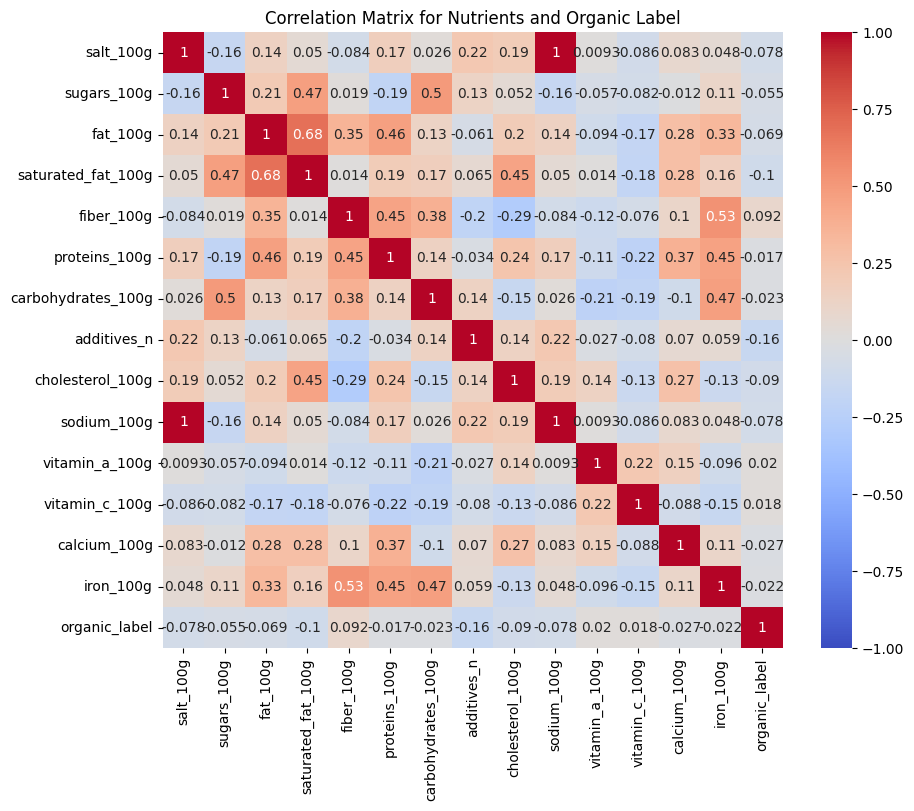

In [ ]:
# Select nutrient columns and organic label for correlation matrix
nutrient_cols = ['salt_100g', 'sugars_100g', 'fat_100g', 'saturated_fat_100g',
                 'fiber_100g', 'proteins_100g', 'carbohydrates_100g',
                 'additives_n', 'cholesterol_100g', 'sodium_100g',
                 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g',
                 'iron_100g', 'organic_label']

nutrient_df = df_EDA_clean[nutrient_cols]

# Plot correlation heatmap
corr_matrix = nutrient_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Nutrients and Organic Label")
plt.show()


Observation: the correlation matrix with whole dataset
shows a weak negative correlation (-0.055) between sugars_100g and organic_label.

**Correlation Analysis by Groups**

We will get the correlation between *sugars_100g* and *organic_label* by *group_id*. Then check the distribution of the correlations to see if there is a skewness towards positive or negative.


--- corr(additives_n, organic_label) by group_id ---
Summary Statistics:
count    1482.000000
mean       -0.182615
std         0.582857
min        -1.000000
25%        -0.581838
50%        -0.250000
75%         0.143021
max         1.000000
Name: (additives_n, organic_label), dtype: float64


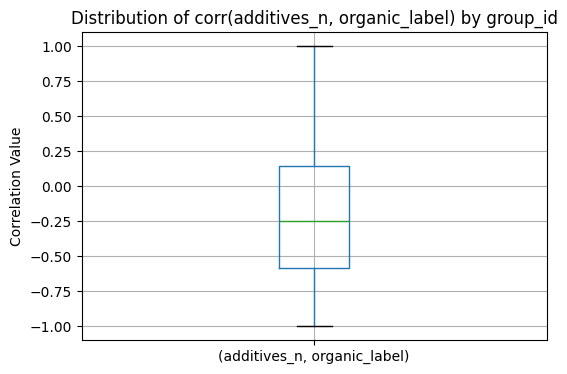

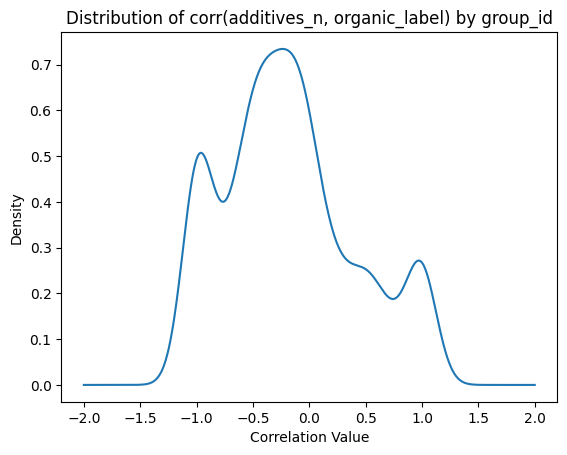

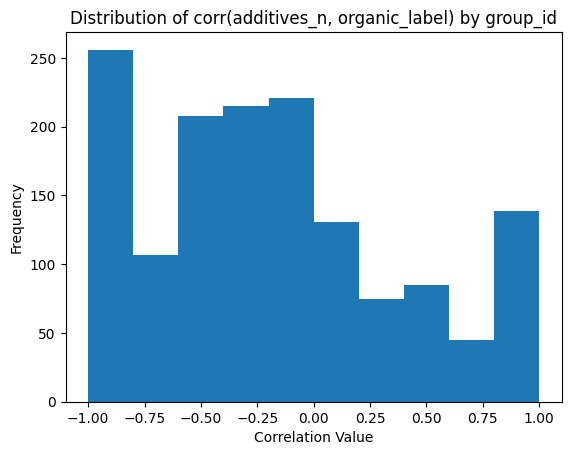




--- corr(fat_100g, organic_label) by group_id ---
Summary Statistics:
count    2036.000000
mean       -0.027796
std         0.650621
min        -1.000000
25%        -0.518712
50%        -0.072898
75%         0.496501
max         1.000000
Name: (fat_100g, organic_label), dtype: float64


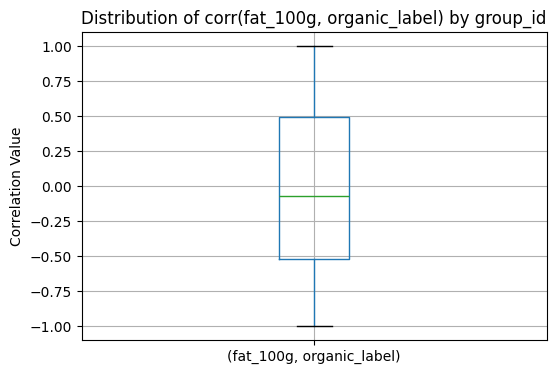

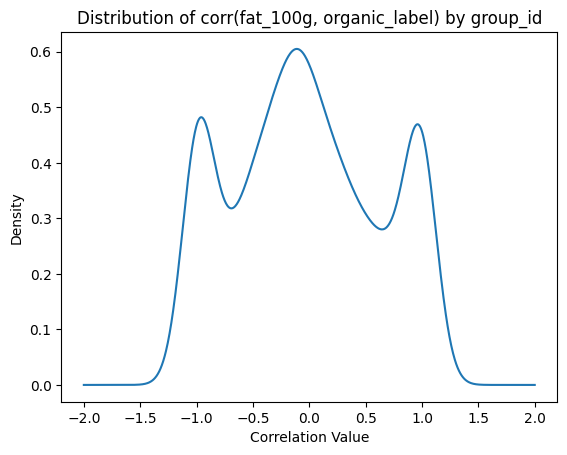

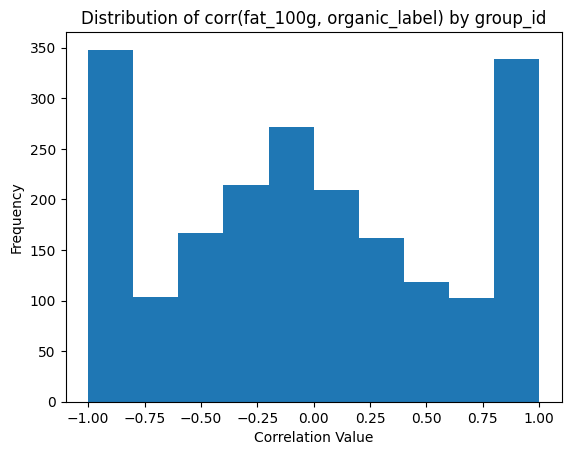




--- corr(saturated_fat_100g, organic_label) by group_id ---
Summary Statistics:
count    1686.000000
mean       -0.070530
std         0.638168
min        -1.000000
25%        -0.538622
50%        -0.112229
75%         0.399474
max         1.000000
Name: (saturated_fat_100g, organic_label), dtype: float64


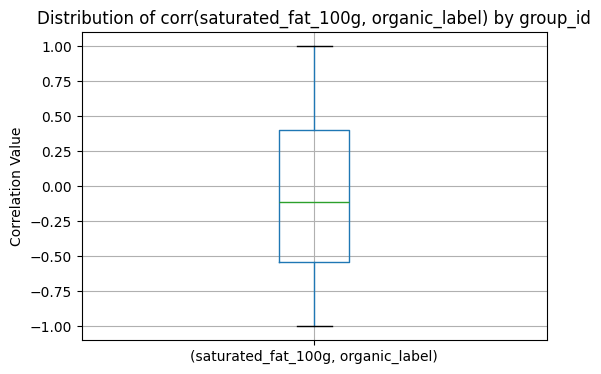

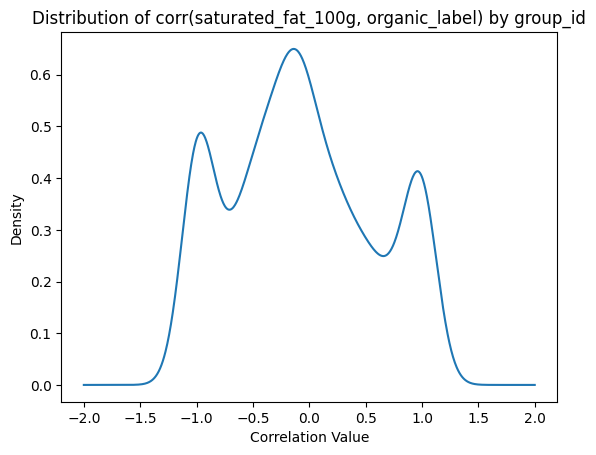

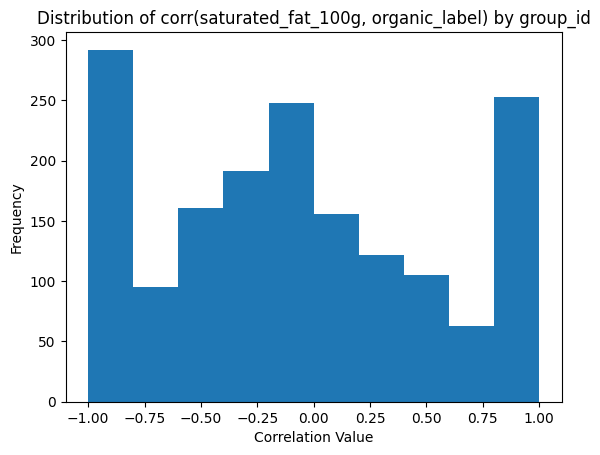




--- corr(trans_fat_100g, organic_label) by group_id ---
Summary Statistics:
count    111.000000
mean      -0.145750
std        0.365749
min       -1.000000
25%       -0.230487
50%       -0.078039
75%       -0.024493
max        1.000000
Name: (trans_fat_100g, organic_label), dtype: float64


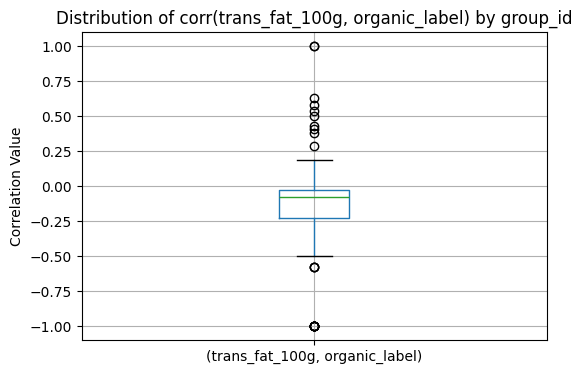

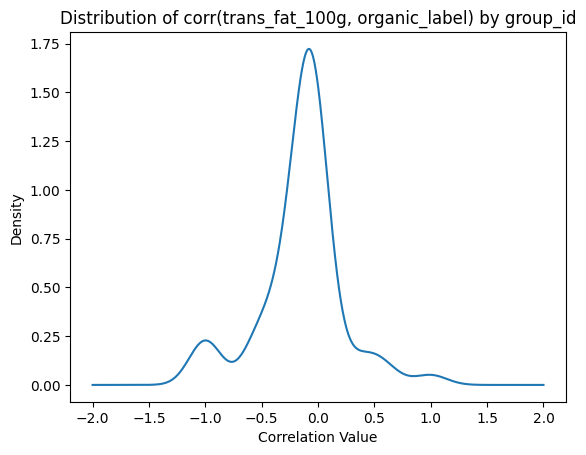

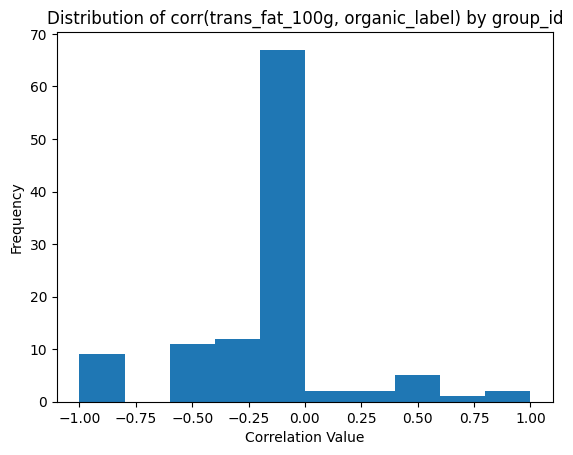




--- corr(cholesterol_100g, organic_label) by group_id ---
Summary Statistics:
count    1071.000000
mean       -0.136507
std         0.609182
min        -1.000000
25%        -0.551572
50%        -0.196537
75%         0.223775
max         1.000000
Name: (cholesterol_100g, organic_label), dtype: float64


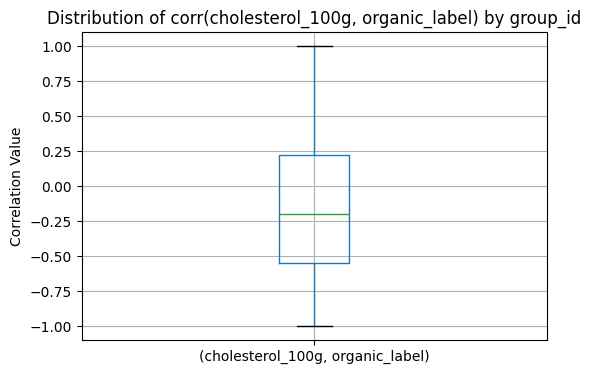

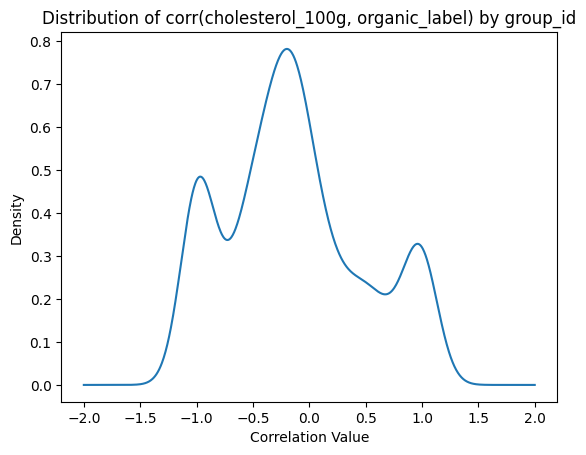

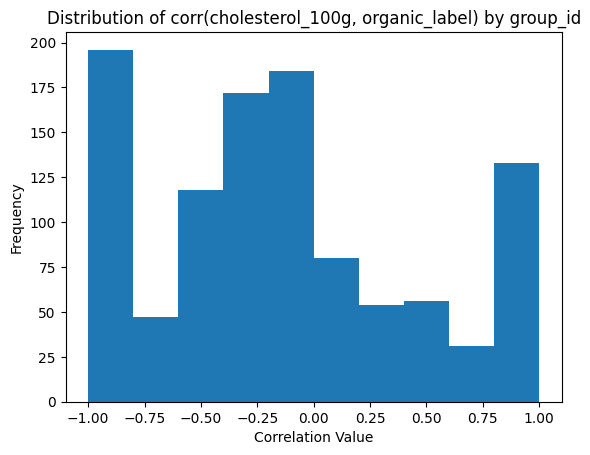




--- corr(carbohydrates_100g, organic_label) by group_id ---
Summary Statistics:
count    2262.000000
mean        0.030117
std         0.654097
min        -1.000000
25%        -0.455980
50%         0.000153
75%         0.559878
max         1.000000
Name: (carbohydrates_100g, organic_label), dtype: float64


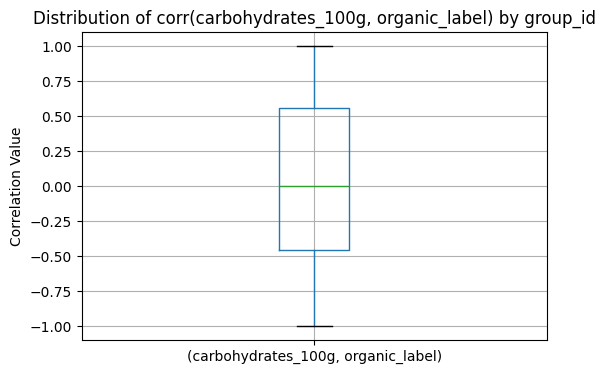

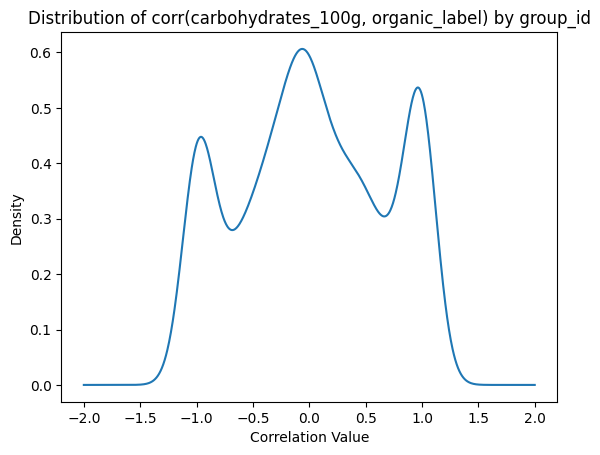

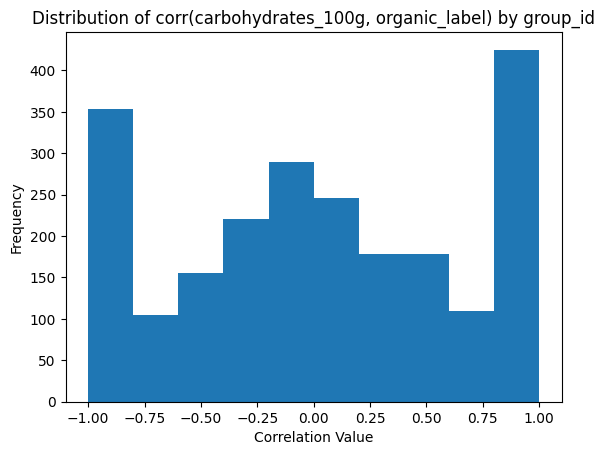




--- corr(sugars_100g, organic_label) by group_id ---
Summary Statistics:
count    2180.000000
mean       -0.032024
std         0.646781
min        -1.000000
25%        -0.526317
50%        -0.079802
75%         0.500000
max         1.000000
Name: (sugars_100g, organic_label), dtype: float64


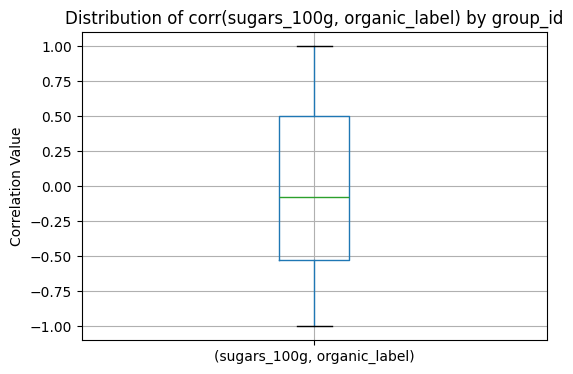

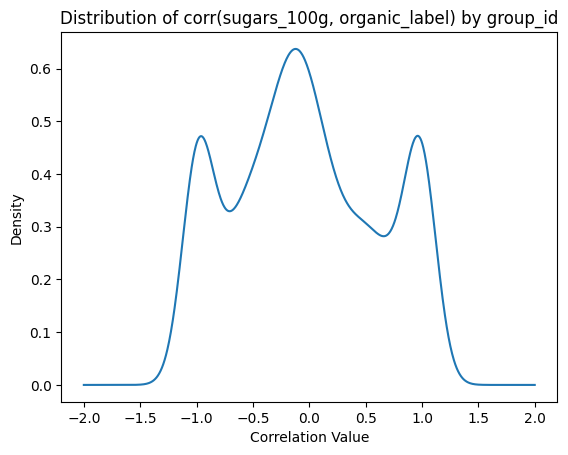

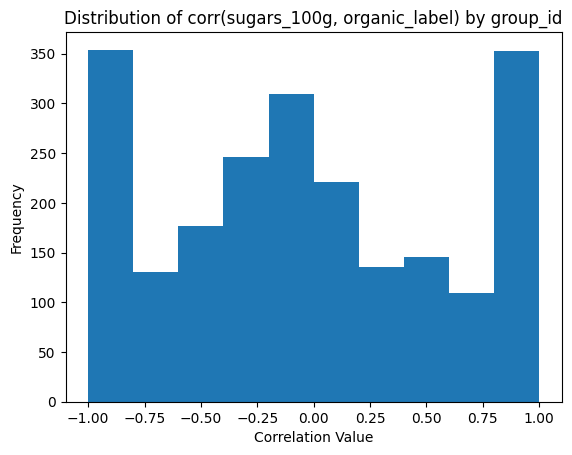




--- corr(fiber_100g, organic_label) by group_id ---
Summary Statistics:
count    1981.000000
mean        0.094590
std         0.641720
min        -1.000000
25%        -0.362372
50%         0.095709
75%         0.637671
max         1.000000
Name: (fiber_100g, organic_label), dtype: float64


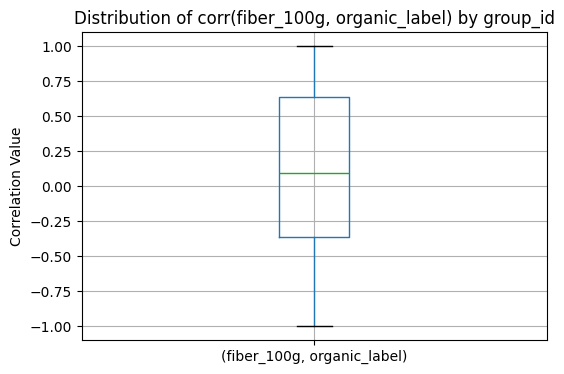

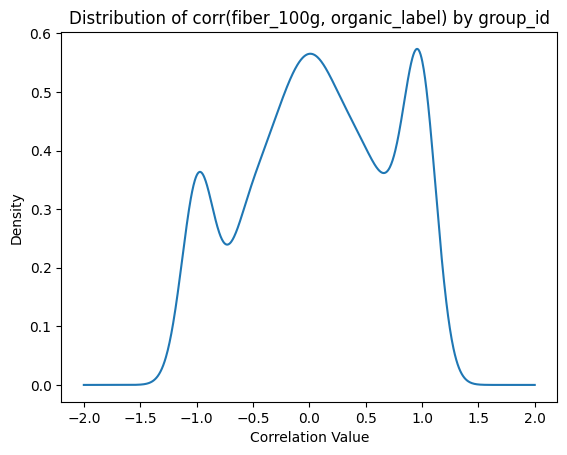

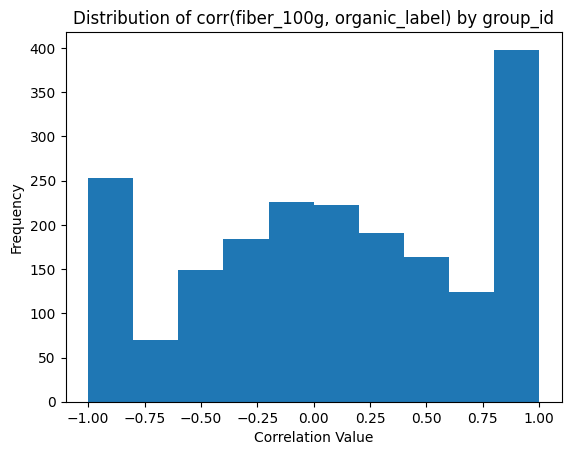




--- corr(proteins_100g, organic_label) by group_id ---
Summary Statistics:
count    2122.000000
mean        0.009308
std         0.653998
min        -1.000000
25%        -0.500000
50%        -0.013924
75%         0.563673
max         1.000000
Name: (proteins_100g, organic_label), dtype: float64


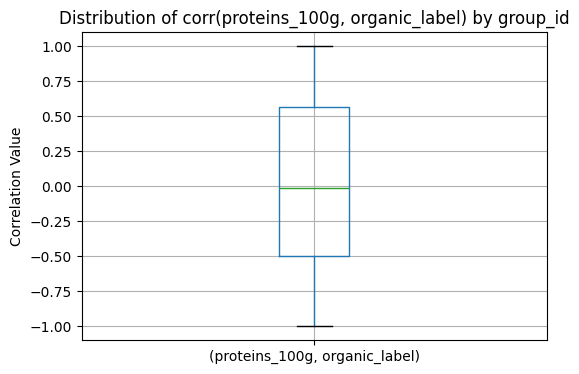

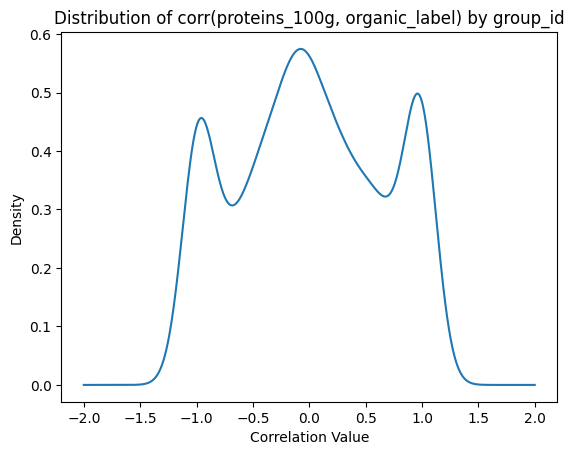

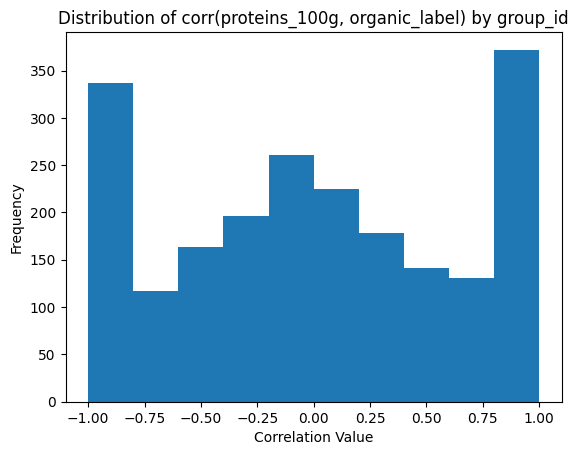




--- corr(salt_100g, organic_label) by group_id ---
Summary Statistics:
count    2218.000000
mean       -0.073906
std         0.649664
min        -1.000000
25%        -0.585078
50%        -0.113303
75%         0.410232
max         1.000000
Name: (salt_100g, organic_label), dtype: float64


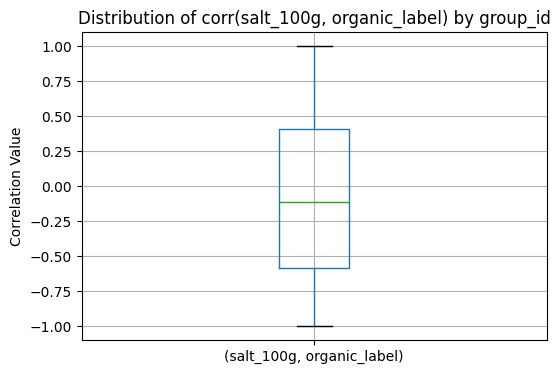

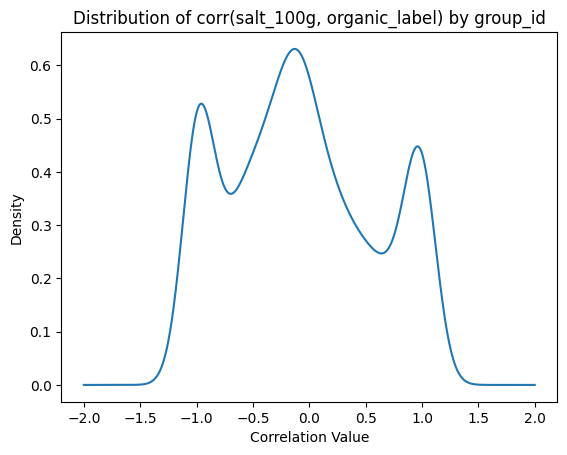

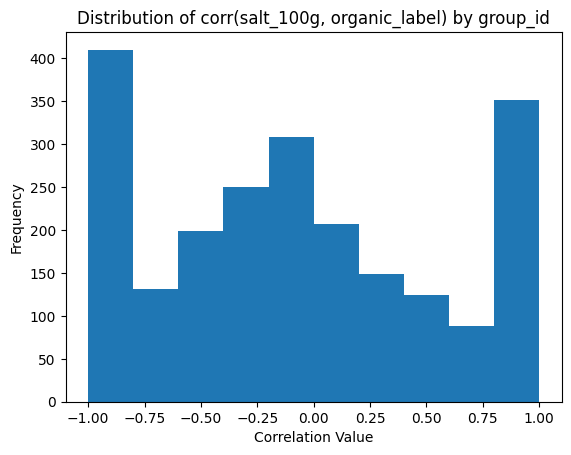




--- corr(sodium_100g, organic_label) by group_id ---
Summary Statistics:
count    2218.000000
mean       -0.073907
std         0.649664
min        -1.000000
25%        -0.584930
50%        -0.113303
75%         0.410232
max         1.000000
Name: (sodium_100g, organic_label), dtype: float64


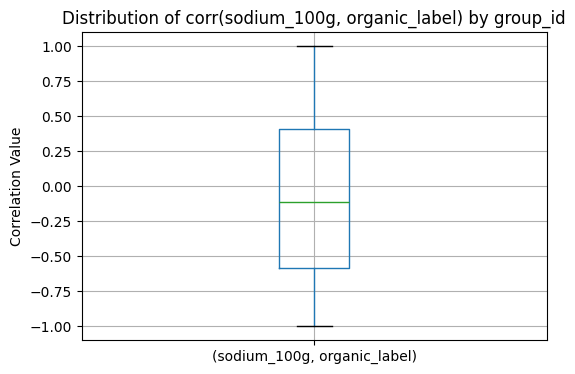

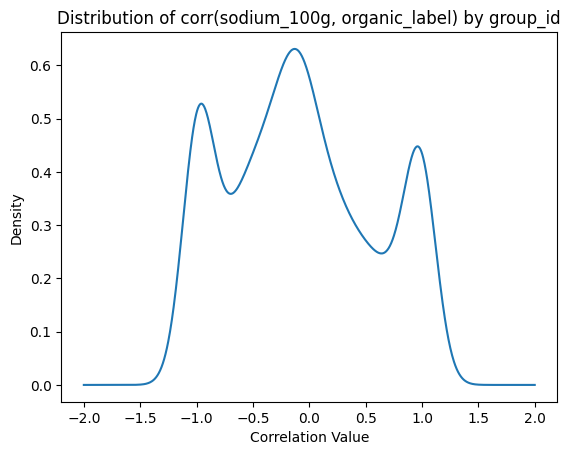

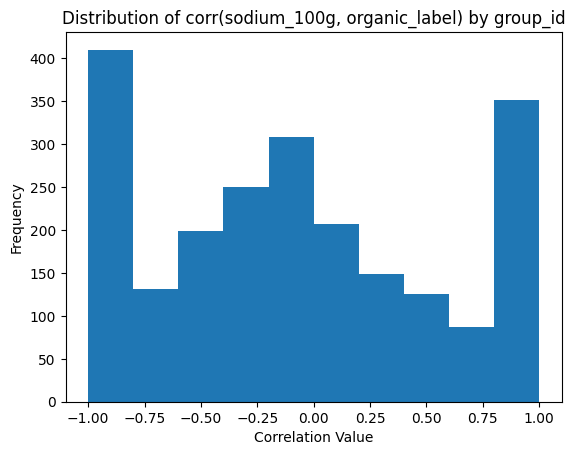




--- corr(vitamin_a_100g, organic_label) by group_id ---
Summary Statistics:
count    1564.000000
mean       -0.024290
std         0.600138
min        -1.000000
25%        -0.415690
50%        -0.088201
75%         0.411325
max         1.000000
Name: (vitamin_a_100g, organic_label), dtype: float64


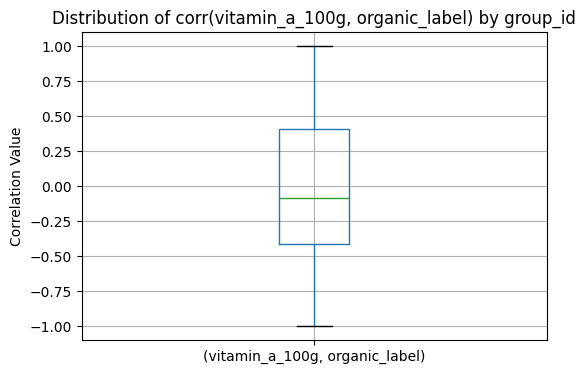

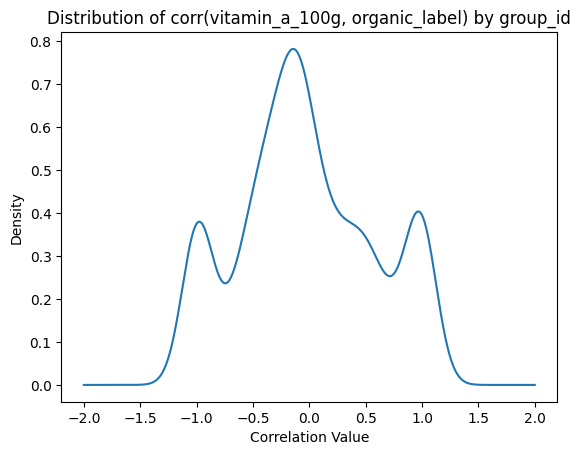

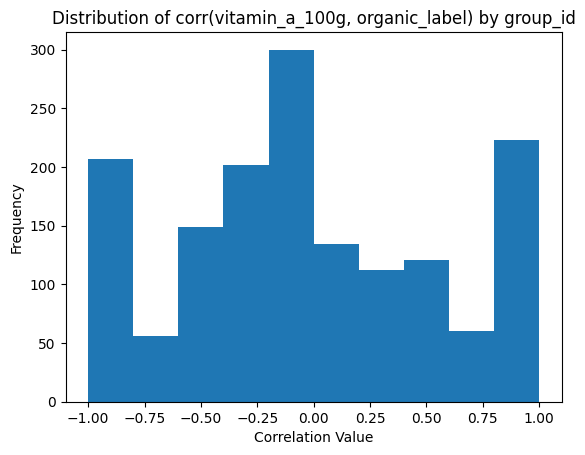




--- corr(vitamin_c_100g, organic_label) by group_id ---
Summary Statistics:
count    1569.000000
mean       -0.017962
std         0.597060
min        -1.000000
25%        -0.408001
50%        -0.085631
75%         0.441476
max         1.000000
Name: (vitamin_c_100g, organic_label), dtype: float64


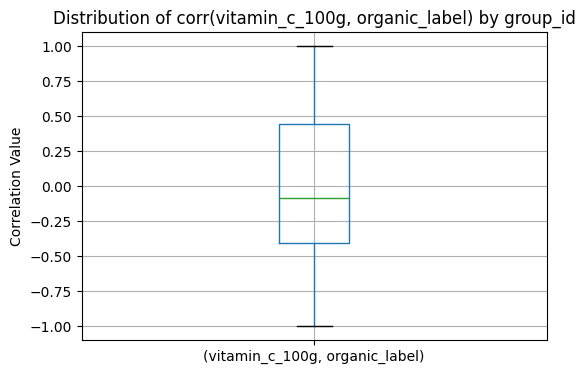

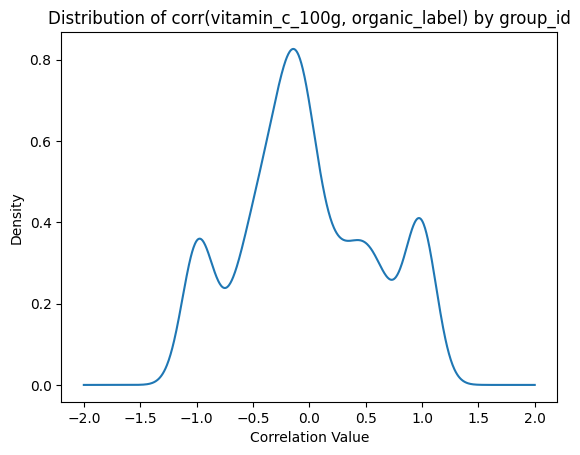

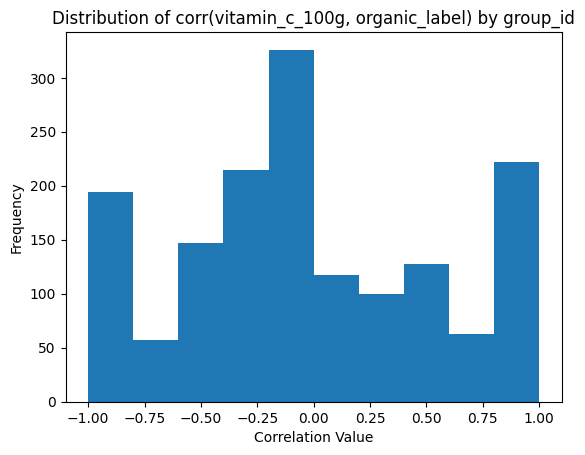




--- corr(calcium_100g, organic_label) by group_id ---
Summary Statistics:
count    2001.000000
mean       -0.016333
std         0.627703
min        -1.000000
25%        -0.477890
50%        -0.070535
75%         0.487950
max         1.000000
Name: (calcium_100g, organic_label), dtype: float64


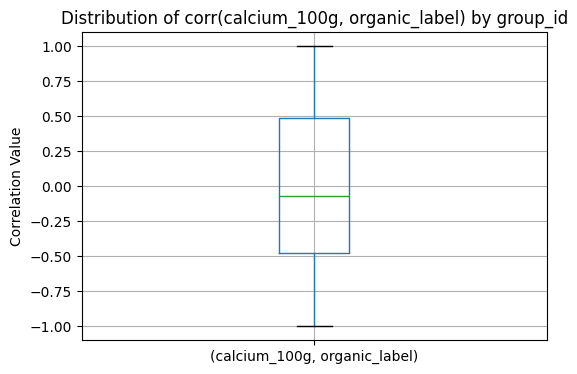

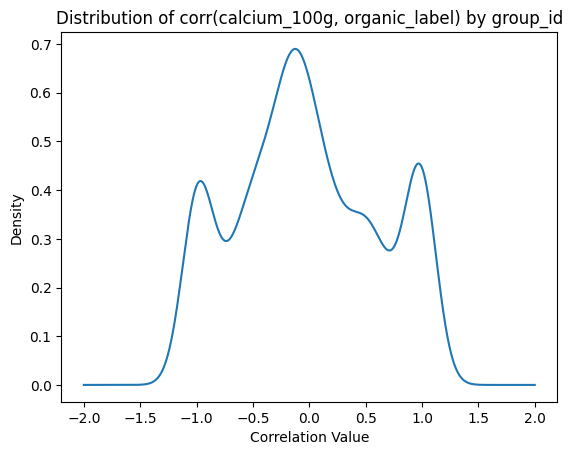

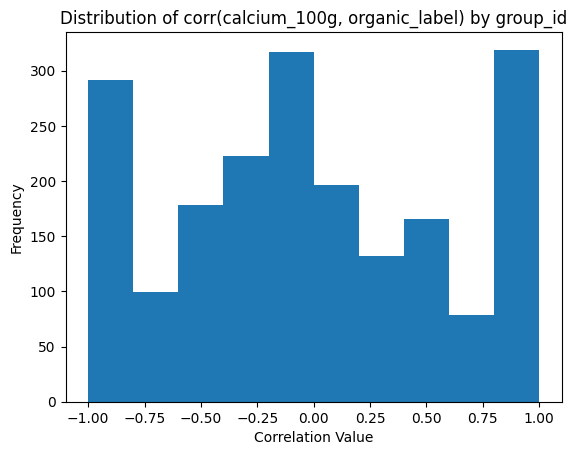




--- corr(iron_100g, organic_label) by group_id ---
Summary Statistics:
count    2114.000000
mean        0.045859
std         0.640506
min        -1.000000
25%        -0.430432
50%         0.015260
75%         0.568563
max         1.000000
Name: (iron_100g, organic_label), dtype: float64


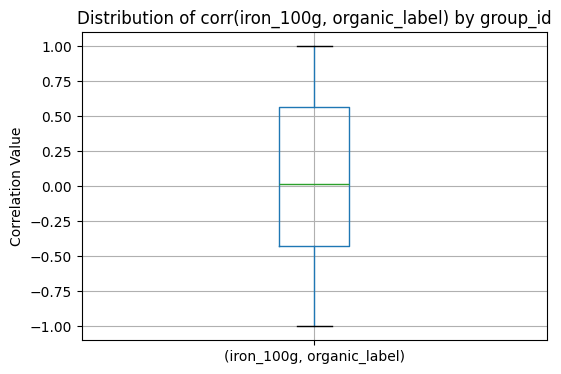

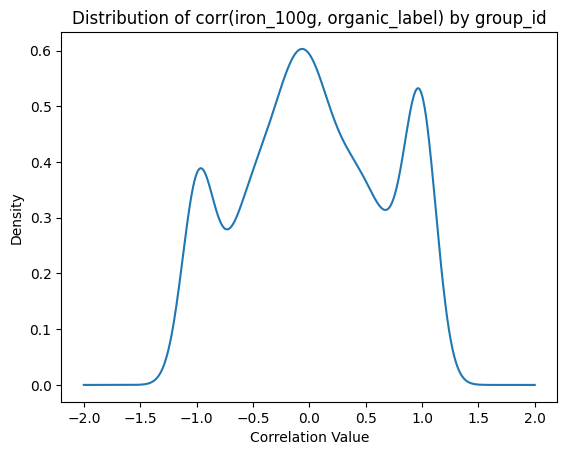

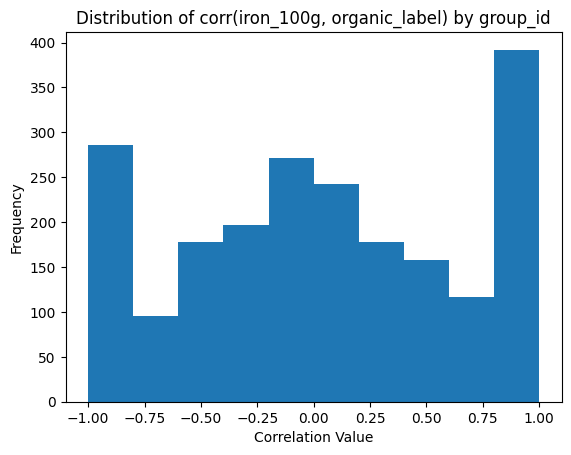

In [ ]:
# All the numeric key columns to analyze
all_ingredient_columns = [
    'additives_n', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g',
    'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin_a_100g',
    'vitamin_c_100g', 'calcium_100g', 'iron_100g'
]

# Initialize an empty dictionary to store the summaries for each ingredient
ingredient_corr_data_dict = {}
ingredient_summaries_dict = {}

for ingredient in all_ingredient_columns:
  print(f"\n--- corr({ingredient}, organic_label) by group_id ---")

  # Dataframe of correlation between ingredient and organic_label by group_id
  df_corr_ingredient_organic_label_by_group = df_EDA_clean.groupby('group_id')\
   [[ingredient, 'organic_label']].corr()\
   .unstack()[[(ingredient, 'organic_label')]].reset_index()

  # Data Series of correlations
  ingredient_corr_data = df_corr_ingredient_organic_label_by_group\
   [(ingredient, 'organic_label')]

  # print stats of correlations
  summary_corr_stats = ingredient_corr_data.describe()
  print("Summary Statistics:")
  print(summary_corr_stats)

  # Store data in dictionaries for later reference
  ingredient_corr_data_dict[ingredient] = ingredient_corr_data
  ingredient_summaries_dict[ingredient] = summary_corr_stats

  # Boxplot to visualize the distribution of the correlation by groups
  plt.figure(figsize=(6, 4))
  df_corr_ingredient_organic_label_by_group.boxplot(column=[(ingredient, 'organic_label')])
  plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
  plt.ylabel('Correlation Value')
  plt.show()

  # Visualize the distribution of the correlations by groups
  ingredient_corr_data.plot.kde()
  plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
  plt.xlabel('Correlation Value')
  plt.show()

  ingredient_corr_data.plot.hist()
  plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
  plt.xlabel('Correlation Value')
  plt.show()

  print('\n')

In [ ]:
# Combine all individual summaries into a single DataFrame
summary_df = pd.DataFrame(ingredient_summaries_dict)
print("\nSummary Table for All Ingredients:")
print(summary_df)


Summary Table for All Ingredients:
       additives_n     fat_100g  saturated_fat_100g  trans_fat_100g  \
count  1482.000000  2036.000000         1686.000000      111.000000   
mean     -0.182615    -0.027796           -0.070530       -0.145750   
std       0.582857     0.650621            0.638168        0.365749   
min      -1.000000    -1.000000           -1.000000       -1.000000   
25%      -0.581838    -0.518712           -0.538622       -0.230487   
50%      -0.250000    -0.072898           -0.112229       -0.078039   
75%       0.143021     0.496501            0.399474       -0.024493   
max       1.000000     1.000000            1.000000        1.000000   

       cholesterol_100g  carbohydrates_100g  sugars_100g   fiber_100g  \
count       1071.000000         2262.000000  2180.000000  1981.000000   
mean          -0.136507            0.030117    -0.032024     0.094590   
std            0.609182            0.654097     0.646781     0.641720   
min           -1.000000         

**Correlation Analysis by Groups for sugars_100g**

In [ ]:
# Check the statistics of correlations by groups for sugars_100g
ingredient = 'sugars_100g'

ingredient_corr_data = ingredient_corr_data_dict[ingredient]
summary_corr_stats = ingredient_summaries_dict[ingredient]

# print stats of correlations
summary_corr_stats = ingredient_corr_data.describe()
print("Summary Statistics:")
print(summary_corr_stats)

Summary Statistics:
count    2180.000000
mean       -0.032024
std         0.646781
min        -1.000000
25%        -0.526317
50%        -0.079802
75%         0.500000
max         1.000000
Name: (sugars_100g, organic_label), dtype: float64


Observation: the mean of correlations by groups is -0.032024, which shows weak negative relationship.

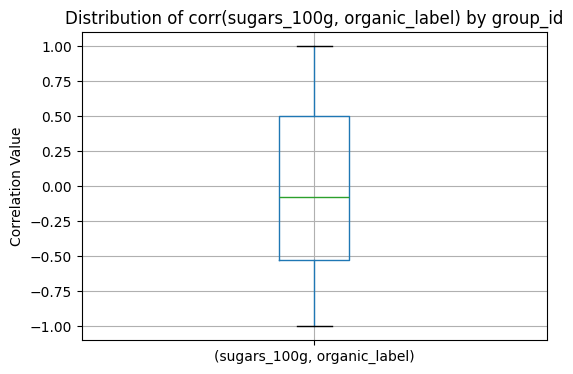

In [ ]:
# Plot boxplot to visualize the distribution of the correlations by groups between sugars_100g and organic_label

df_corr_ingredient_organic_label_by_group = df_EDA_clean.groupby('group_id')\
   [[ingredient, 'organic_label']].corr()\
   .unstack()[[(ingredient, 'organic_label')]].reset_index()


plt.figure(figsize=(6, 4))
df_corr_ingredient_organic_label_by_group.boxplot(column=[(ingredient, 'organic_label')])
plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
plt.ylabel('Correlation Value')
plt.show()

Observation: most of the correlations are between -0.5 to 0.5. The median is slightly below 0 (-0.079802).

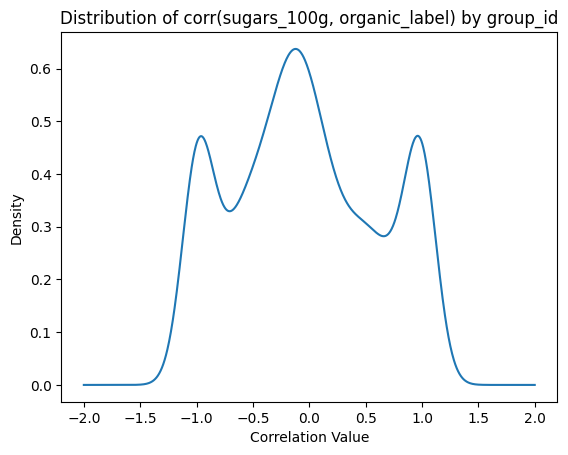

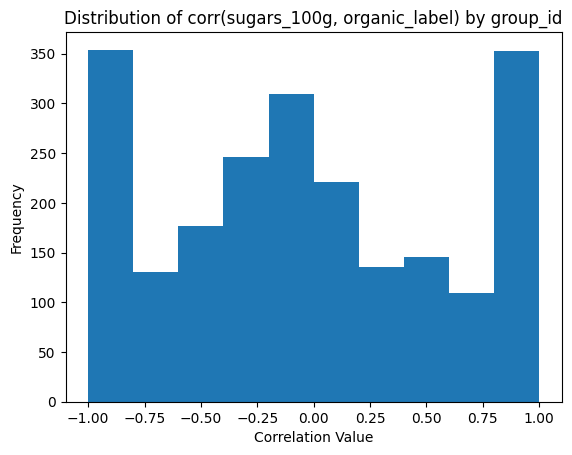

In [ ]:
# Visualize the distribution of the correlations by groups between sugars_100g and organic_label
ingredient_corr_data.plot.kde()
plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
plt.xlabel('Correlation Value')
plt.show()

ingredient_corr_data.plot.hist()
plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
plt.xlabel('Correlation Value')
plt.show()

Observation: there is a slight right skewness. The distribution shows mostly symmetric on both sides of 0. It shows that the relationship between sugars_100g and organic_label is a litte towards negative but very weak.

###EDA with Jaccard grouping dataset

**Prepare data**

In [ ]:
# Load the group labeded data by Jaccard function if needed
df_EDA_group = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CIS 5450/Project/df_EDA_group_Jaccard.csv")

In [ ]:
# Peek
df_EDA_group.head()

product_name  \
0  mixed nuts lightly salted   
1                 lima beans   
2                 lima beans   
3          lima beans hummus   
4           lima green beans   

                                    ingredients_text  additives_n  \
0  peanuts, cashew, almonds, brazil nuts, hazelnu...          0.0   
1  prepared lima beans, water, salt, calcium chlo...          0.0   
2  water, lima beans, salt, calcium chloride, cal...          2.0   
3  lima beans, safflower oil, lemon juice, wheat-...          0.0   
4                           lime beans, water, salt.          0.0   

                                        additives_en nutrition_grade_fr  \
0                                                NaN                  d   
1                                                NaN                  a   
2  E223 - Sodium metabisulphite,E509 - Calcium ch...                  a   
3                                                NaN                  a   
4                                                NaN                  a   

   energy_100g  fat_100g  saturated_fat_100g  trans_fat_100g  \
0       2540.0     53.57                7.14             0.0   
1        368.0      0.00                0.00             0.0   
2        356.0      0.00                0.00             0.0   
3       1117.0     16.67                0.00             0.0   
4        301.0      0.40                0.00             0.0   

   cholesterol_100g  ...  salt_100g  sodium_100g  vitamin_a_100g  \
0               0.0  ...    0.49784        0.196          0.0000   
1               0.0  ...    0.52832        0.208          0.0000   
2               0.0  ...    0.25400        0.100          0.0000   
3               0.0  ...    0.97282        0.383          0.0001   
4               0.0  ...    0.60960        0.240          0.0000   

   vitamin_c_100g  calcium_100g  iron_100g  organic_label  \
0          0.0000         0.143    0.00386              0   
1          0.0000         0.016    0.00115              0   
2          0.0000         0.031    0.00138              0   
3          0.0040         0.067    0.00240              0   
4          0.0038         0.016    0.00144              0   

   nutrition_score_100g  nutrition_grade  group_id  
0                  11.0                2         0  
1                  -4.0                5         0  
2                  -6.0                5         0  
3                  -2.0                5         0  
4                  -3.0                5         0  

[5 rows x 24 columns]

In [ ]:
# if group_id is 0, it means the non-organic product did not find a group match in the organic product. Thus, we will remove them. Sort value by 'group_id' and reset index.
df_EDA = df_EDA_group[df_EDA_group['group_id']!=0].sort_values(by='group_id').reset_index()

In [ ]:
# Although we have removed non-organic data which did not find a group match, we still need to remove groups with only organic data. We first group the data by group_id. Then find out the groups with only one kind of data, which is organic. Filter out these groups.
df_EDA_filter = df_EDA.groupby('group_id')[['group_id','organic_label']]
df_filter = df_EDA_filter.filter(lambda x: len(x['organic_label'].unique()) > 1)
# Find the list of group_id with 2 kinds of data (non-organic and organic). Then use it to filter the data.
group_lst = df_filter['group_id'].unique().tolist()
df_EDA_clean = df_EDA[df_EDA['group_id'].isin(group_lst)].reset_index(drop=True)

In [ ]:
# Now we have 23718 rows of data left. Each group data contains similar products of both non-organic and organic.
df_EDA_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23718 entries, 0 to 23717
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23718 non-null  int64  
 1   product_name          23718 non-null  object 
 2   ingredients_text      23718 non-null  object 
 3   additives_n           23718 non-null  float64
 4   additives_en          12379 non-null  object 
 5   nutrition_grade_fr    23718 non-null  object 
 6   energy_100g           23718 non-null  float64
 7   fat_100g              23718 non-null  float64
 8   saturated_fat_100g    23718 non-null  float64
 9   trans_fat_100g        23718 non-null  float64
 10  cholesterol_100g      23718 non-null  float64
 11  carbohydrates_100g    23718 non-null  float64
 12  sugars_100g           23718 non-null  float64
 13  fiber_100g            23718 non-null  float64
 14  proteins_100g         23718 non-null  float64
 15  salt_100g          

**Descriptive Analysis of Non-organic vs Organic sugars_100g data**

In [ ]:
# Separate organic and non-organic sugar data
organic_sugar = df_EDA_clean[df_EDA_clean['organic_label'] == 1]['sugars_100g']
non_organic_sugar = df_EDA_clean[df_EDA_clean['organic_label'] == 0]['sugars_100g']

In [ ]:
# Summary statistics
print("Summary Statistics for sugars_100g:")
print("Organic Products:\n", organic_sugar.describe())
print("\nNon-Organic Products:\n", non_organic_sugar.describe())

Summary Statistics for sugars_100g:
Organic Products:
 count    5085.000000
mean       10.175021
std        13.895066
min         0.000000
25%         1.670000
50%         4.290000
75%        12.000000
max        72.500000
Name: sugars_100g, dtype: float64

Non-Organic Products:
 count    18633.000000
mean        11.471786
std         15.592105
min          0.000000
25%          2.380000
50%          4.580000
75%         12.900000
max         72.730000
Name: sugars_100g, dtype: float64


Observation: the average sugar level per 100g in non-organic products (11.471786g) is higher than in organic products (10.175021g). The median is also higher in non-organic products (4.580000g vs 4.290000g). From this data set, it shows that in general the non-organic products contains more sugar than organic products on average.

**Correlation Matrix for Nutrients and Organic Label**

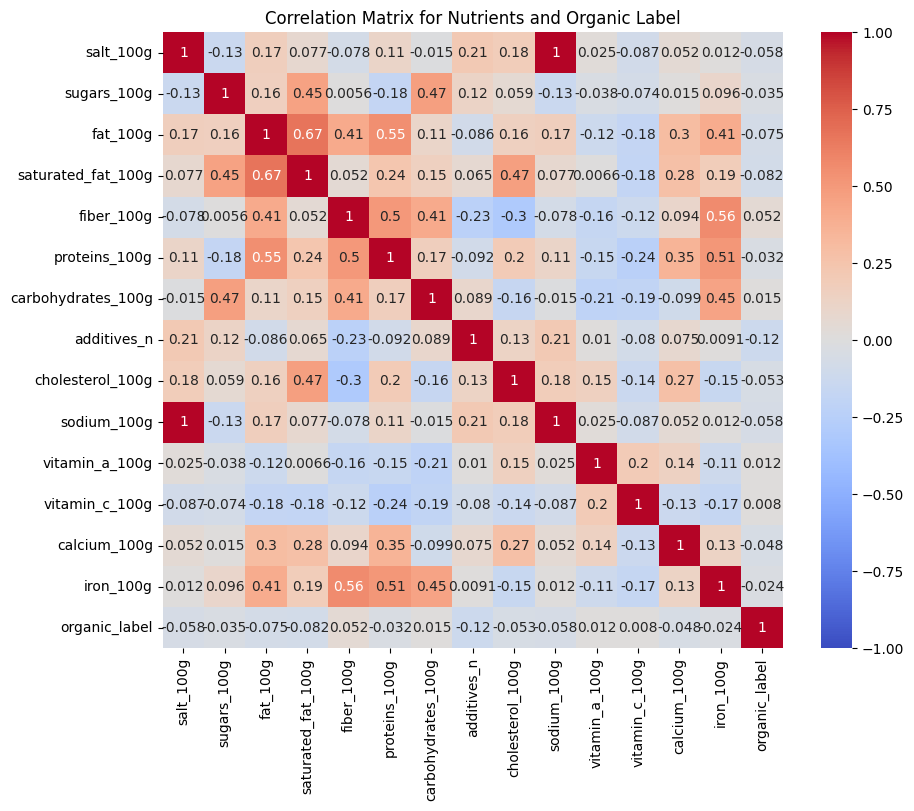

In [ ]:
# Select nutrient columns and organic label for correlation matrix
nutrient_cols = ['salt_100g', 'sugars_100g', 'fat_100g', 'saturated_fat_100g',
                 'fiber_100g', 'proteins_100g', 'carbohydrates_100g',
                 'additives_n', 'cholesterol_100g', 'sodium_100g',
                 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g',
                 'iron_100g', 'organic_label']

nutrient_df = df_EDA_clean[nutrient_cols]

# Plot correlation heatmap
corr_matrix = nutrient_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Nutrients and Organic Label")
plt.show()


Observation: the correlation matrix with whole dataset
shows a weak negative correlation (-0.035) between sugars_100g and organic_label.

**Correlation Analysis by Groups**

We will get the correlation between *sugars_100g* and *organic_label* by *group_id*. Then check the distribution of the correlations to see if there is a skewness towards positive or negative.


--- corr(additives_n, organic_label) by group_id ---
Summary Statistics:
count    1217.000000
mean       -0.183546
std         0.609841
min        -1.000000
25%        -0.612372
50%        -0.215136
75%         0.142857
max         1.000000
Name: (additives_n, organic_label), dtype: float64


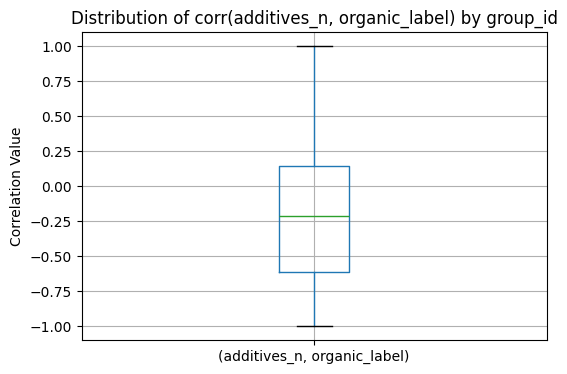

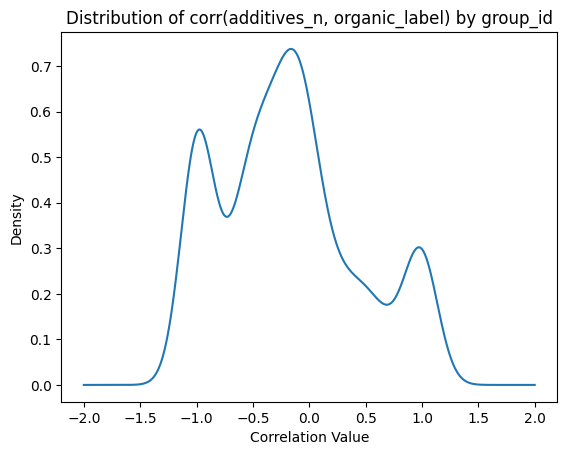

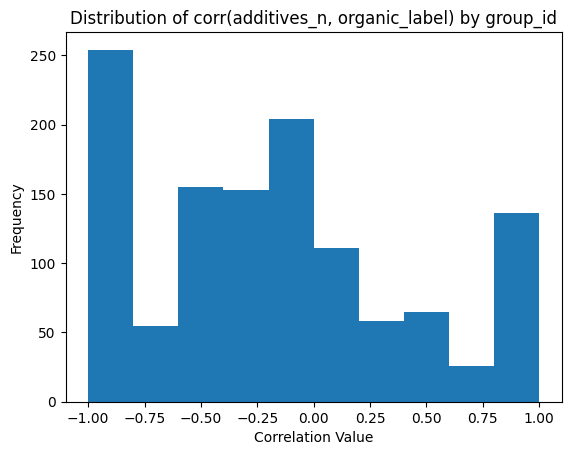




--- corr(fat_100g, organic_label) by group_id ---
Summary Statistics:
count    1761.000000
mean       -0.026645
std         0.672633
min        -1.000000
25%        -0.570425
50%        -0.050000
75%         0.500000
max         1.000000
Name: (fat_100g, organic_label), dtype: float64


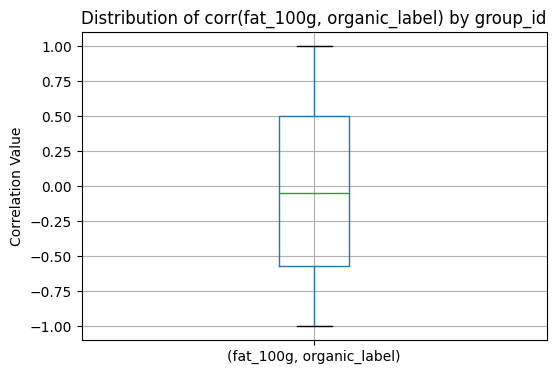

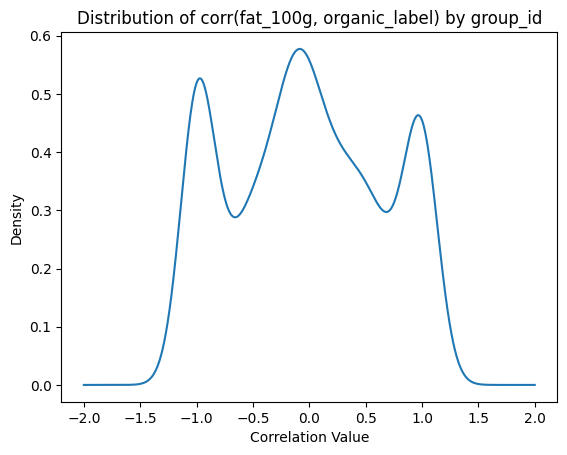

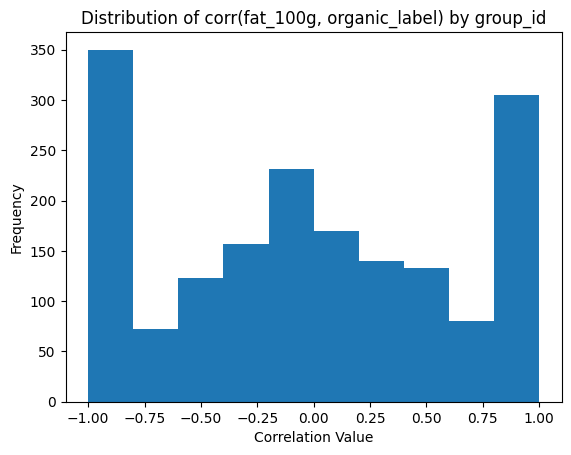




--- corr(saturated_fat_100g, organic_label) by group_id ---
Summary Statistics:
count    1351.000000
mean       -0.034909
std         0.658710
min        -1.000000
25%        -0.531163
50%        -0.072252
75%         0.500000
max         1.000000
Name: (saturated_fat_100g, organic_label), dtype: float64


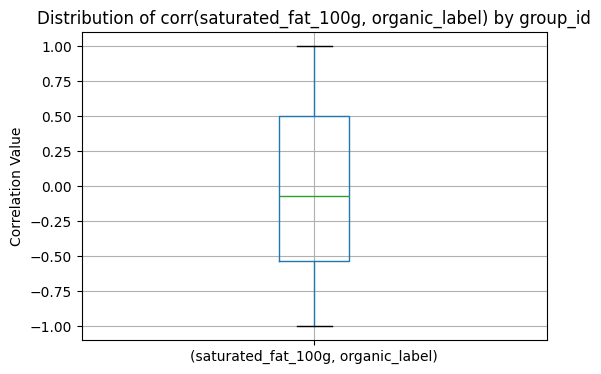

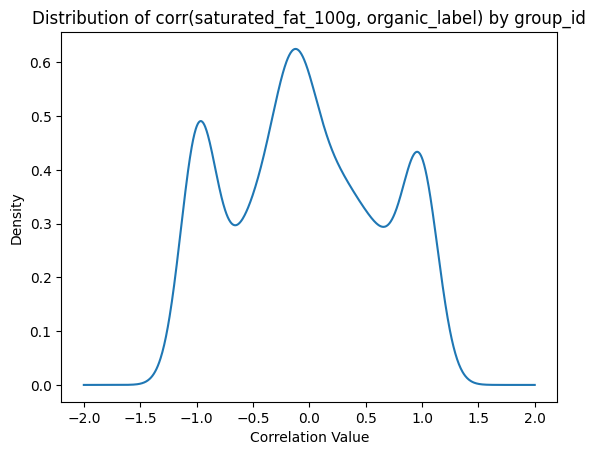

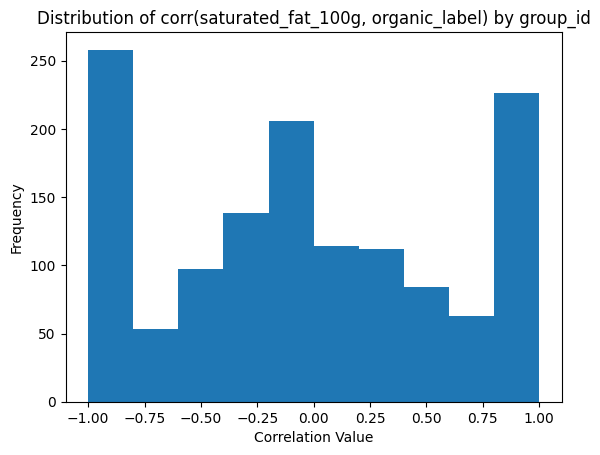




--- corr(trans_fat_100g, organic_label) by group_id ---
Summary Statistics:
count    65.000000
mean     -0.012428
std       0.476503
min      -1.000000
25%      -0.204492
50%      -0.093250
75%      -0.011637
max       1.000000
Name: (trans_fat_100g, organic_label), dtype: float64


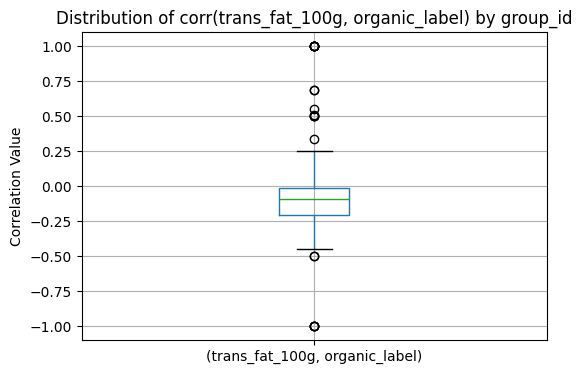

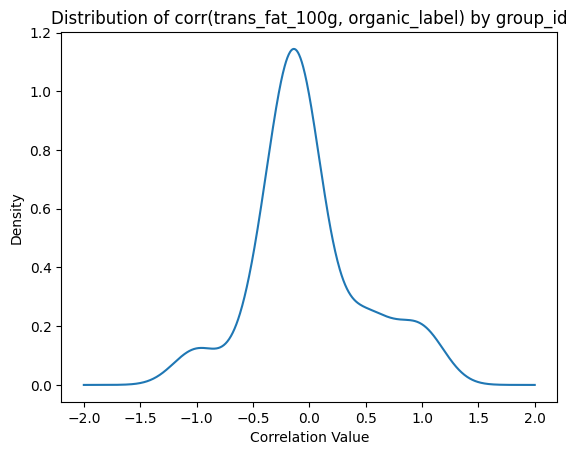

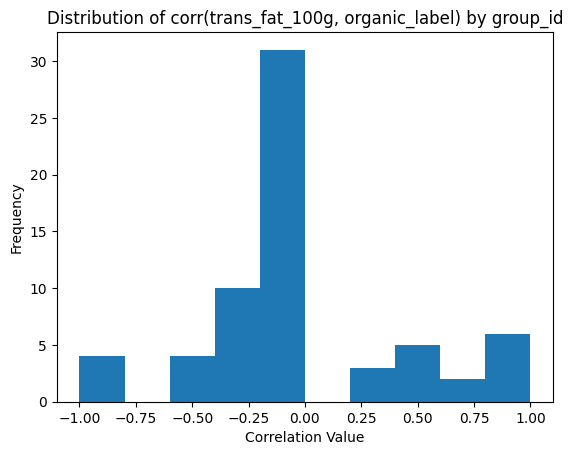




--- corr(cholesterol_100g, organic_label) by group_id ---
Summary Statistics:
count    748.000000
mean      -0.050372
std        0.650559
min       -1.000000
25%       -0.500000
50%       -0.111740
75%        0.498644
max        1.000000
Name: (cholesterol_100g, organic_label), dtype: float64


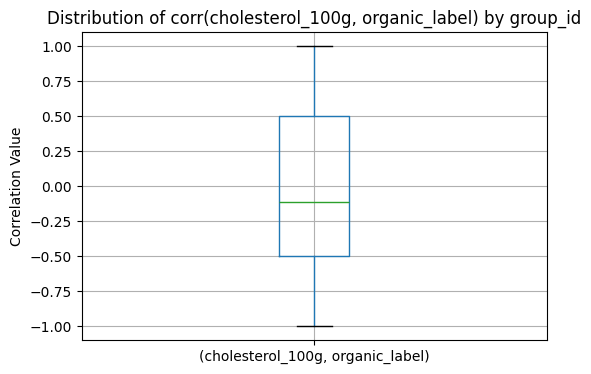

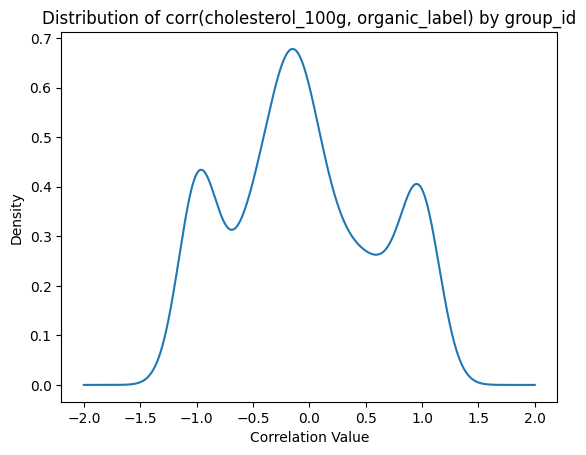

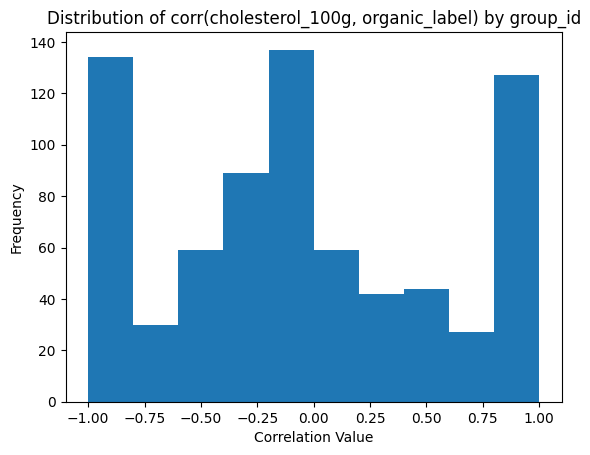




--- corr(carbohydrates_100g, organic_label) by group_id ---
Summary Statistics:
count    2115.000000
mean       -0.037505
std         0.674579
min        -1.000000
25%        -0.577350
50%        -0.055146
75%         0.500000
max         1.000000
Name: (carbohydrates_100g, organic_label), dtype: float64


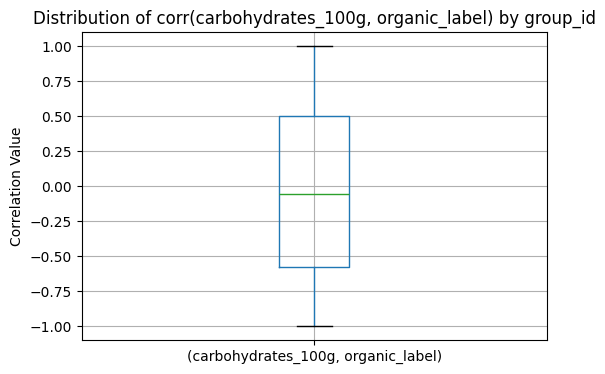

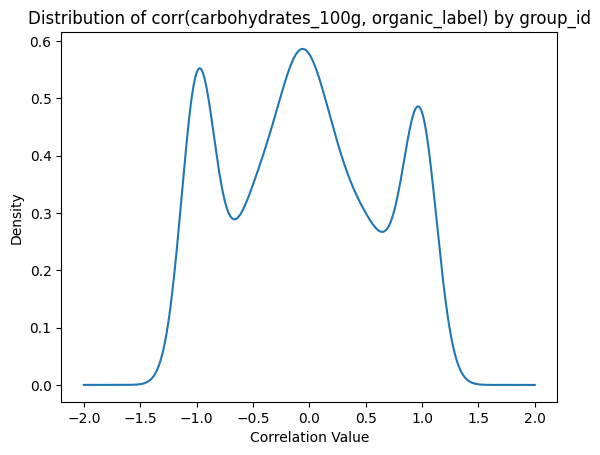

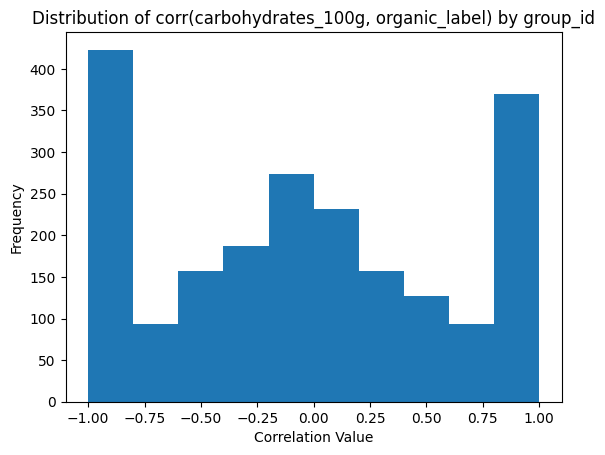




--- corr(sugars_100g, organic_label) by group_id ---
Summary Statistics:
count    1982.000000
mean       -0.061319
std         0.663592
min        -1.000000
25%        -0.577350
50%        -0.084465
75%         0.443365
max         1.000000
Name: (sugars_100g, organic_label), dtype: float64


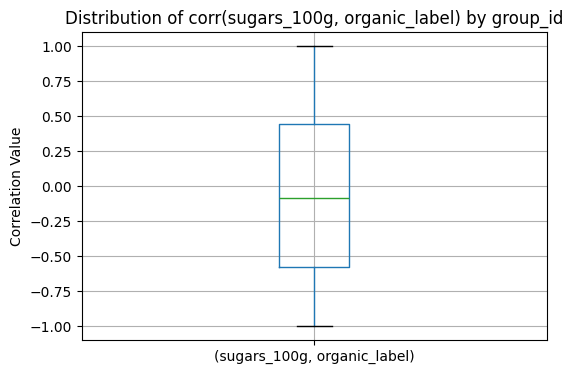

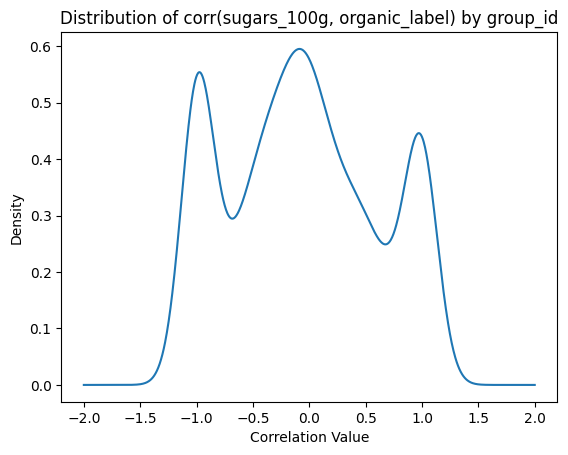

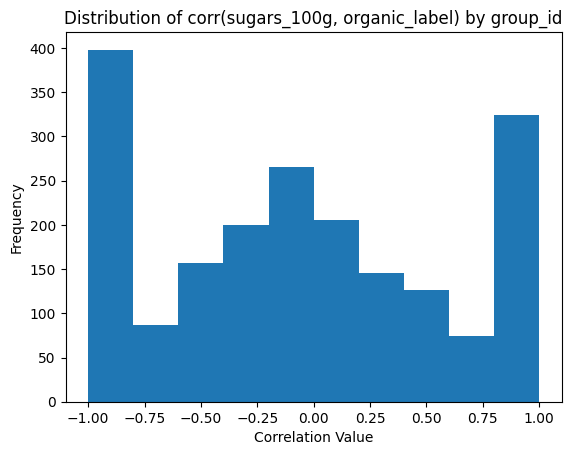




--- corr(fiber_100g, organic_label) by group_id ---
Summary Statistics:
count    1701.000000
mean        0.049297
std         0.670224
min        -1.000000
25%        -0.473815
50%         0.032663
75%         0.581579
max         1.000000
Name: (fiber_100g, organic_label), dtype: float64


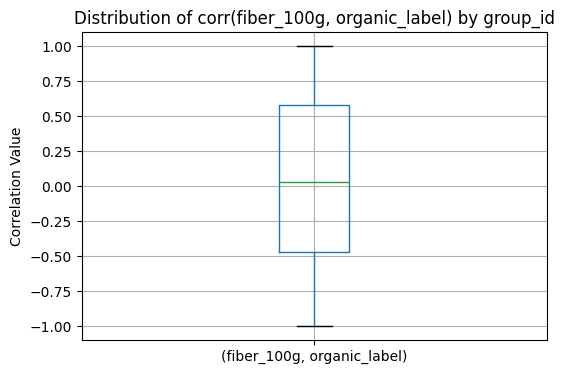

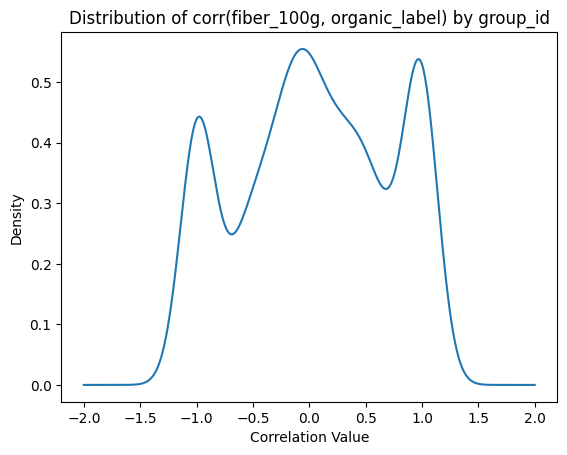

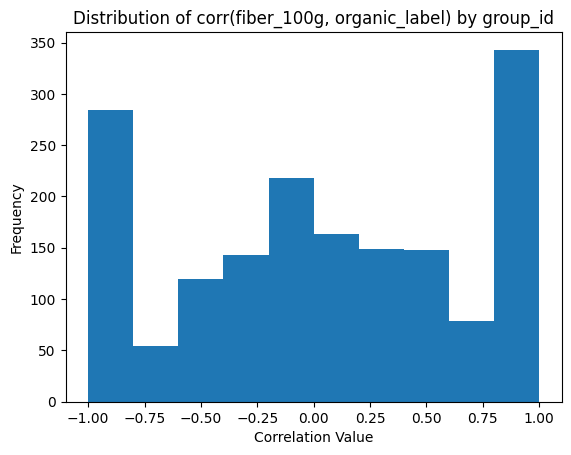




--- corr(proteins_100g, organic_label) by group_id ---
Summary Statistics:
count    1879.000000
mean       -0.022628
std         0.668025
min        -1.000000
25%        -0.551561
50%        -0.027837
75%         0.500000
max         1.000000
Name: (proteins_100g, organic_label), dtype: float64


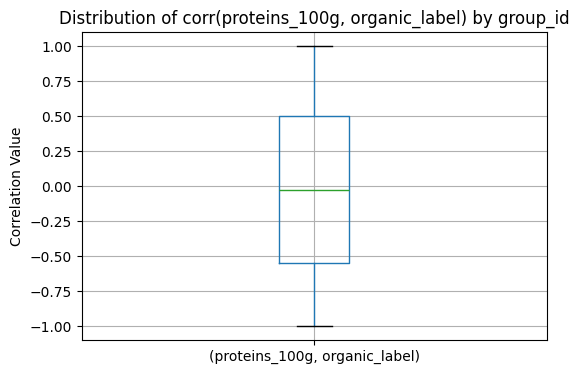

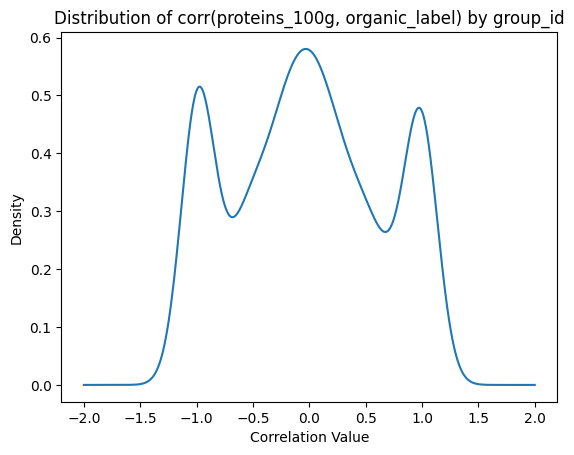

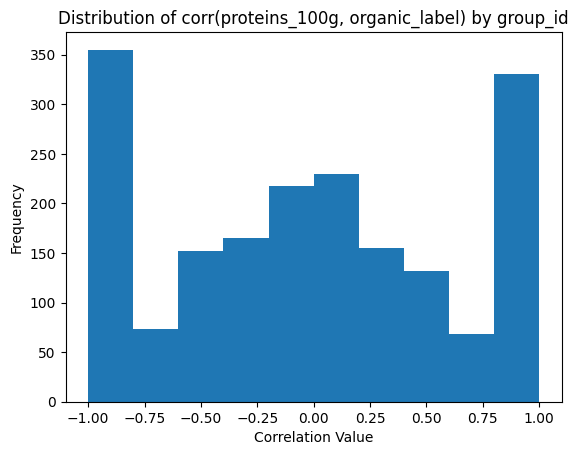




--- corr(salt_100g, organic_label) by group_id ---
Summary Statistics:
count    2031.000000
mean       -0.064294
std         0.681857
min        -1.000000
25%        -0.643295
50%        -0.102894
75%         0.495388
max         1.000000
Name: (salt_100g, organic_label), dtype: float64


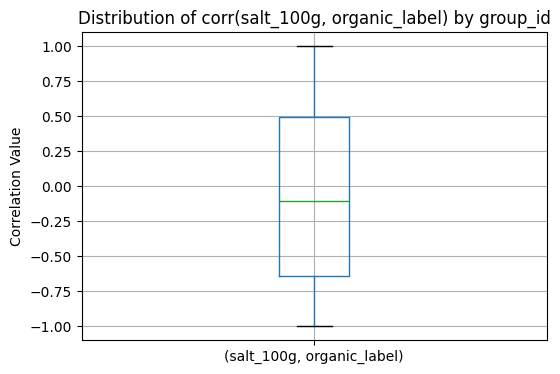

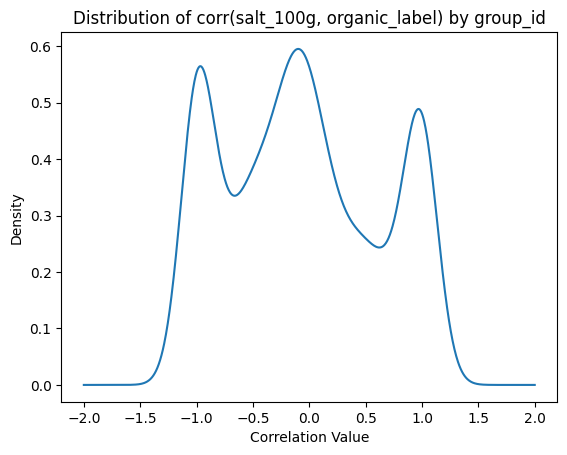

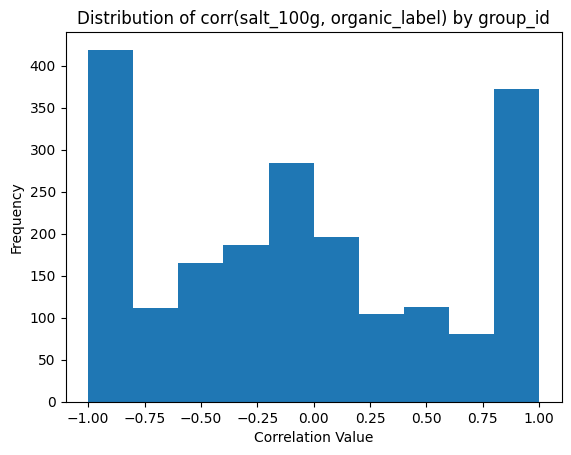




--- corr(sodium_100g, organic_label) by group_id ---
Summary Statistics:
count    2031.000000
mean       -0.064294
std         0.681858
min        -1.000000
25%        -0.643295
50%        -0.102894
75%         0.495388
max         1.000000
Name: (sodium_100g, organic_label), dtype: float64


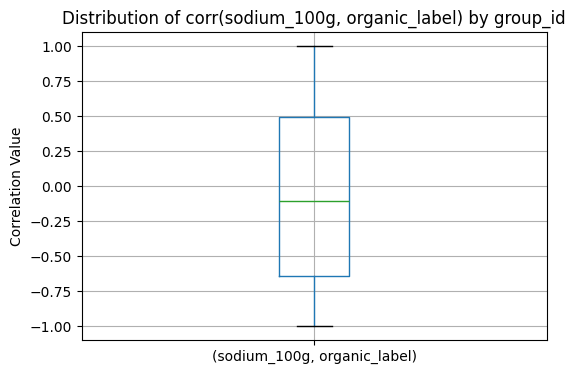

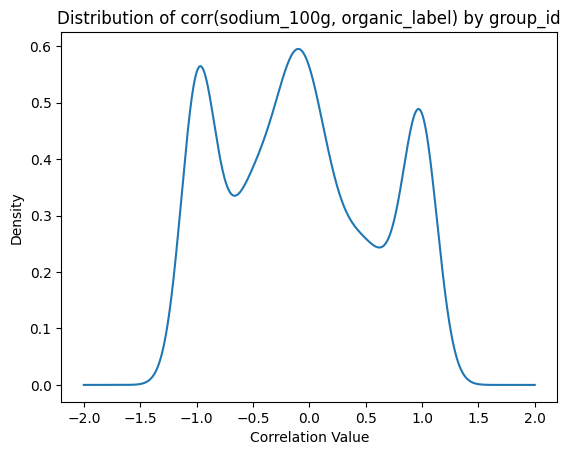

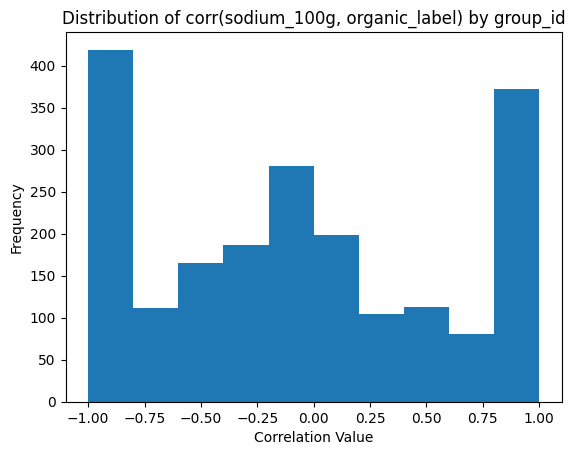




--- corr(vitamin_a_100g, organic_label) by group_id ---
Summary Statistics:
count    1241.000000
mean       -0.037010
std         0.627234
min        -1.000000
25%        -0.475701
50%        -0.086280
75%         0.410072
max         1.000000
Name: (vitamin_a_100g, organic_label), dtype: float64


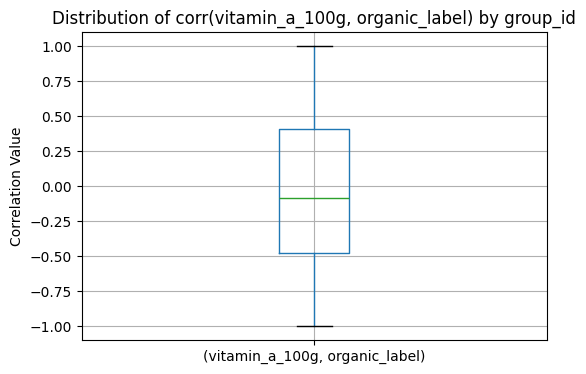

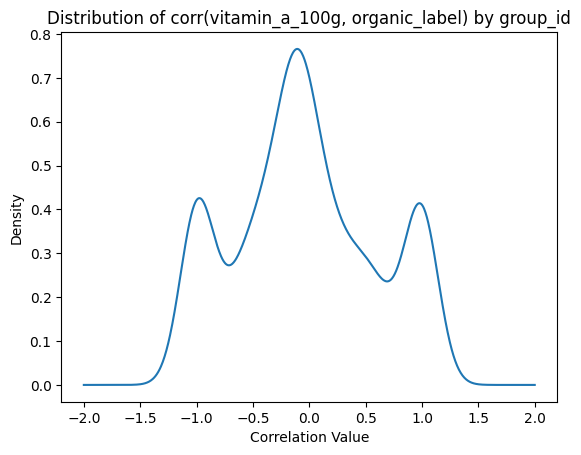

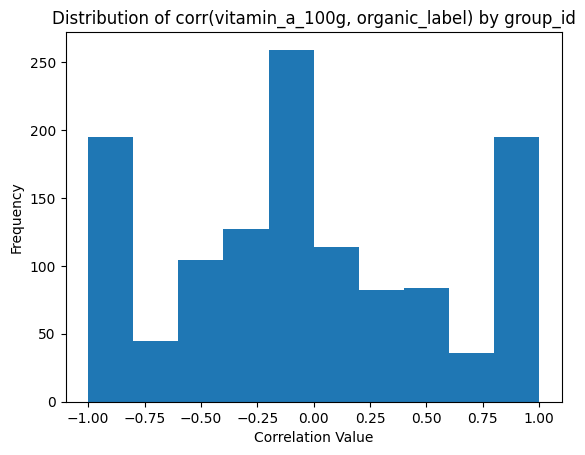




--- corr(vitamin_c_100g, organic_label) by group_id ---
Summary Statistics:
count    1215.000000
mean       -0.009203
std         0.630562
min        -1.000000
25%        -0.452811
50%        -0.077194
75%         0.498759
max         1.000000
Name: (vitamin_c_100g, organic_label), dtype: float64


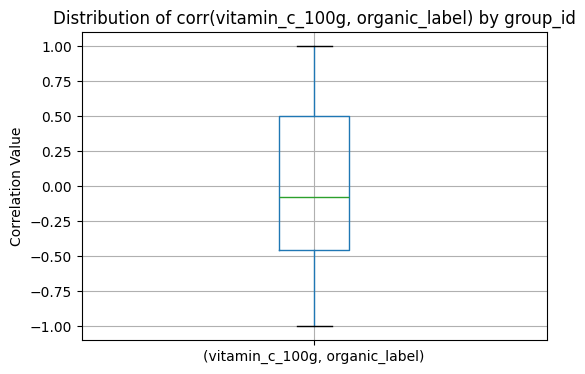

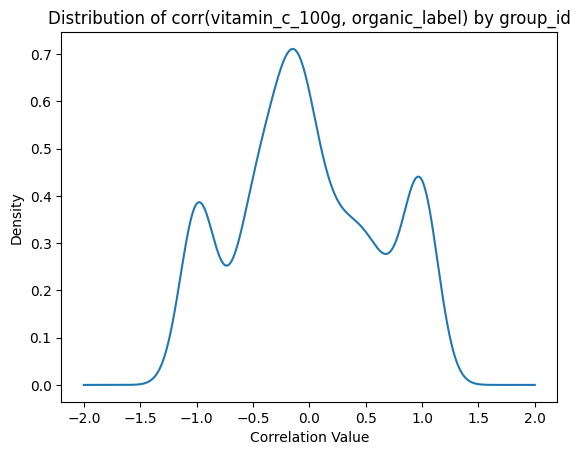

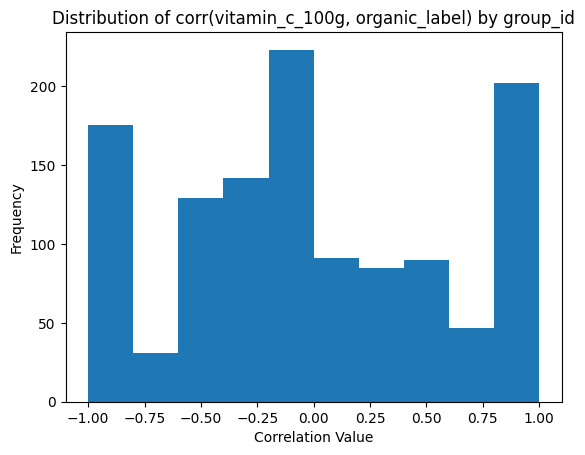




--- corr(calcium_100g, organic_label) by group_id ---
Summary Statistics:
count    1741.000000
mean       -0.044734
std         0.651669
min        -1.000000
25%        -0.500000
50%        -0.110693
75%         0.473466
max         1.000000
Name: (calcium_100g, organic_label), dtype: float64


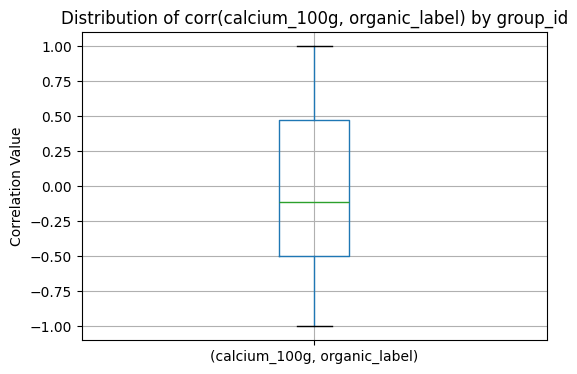

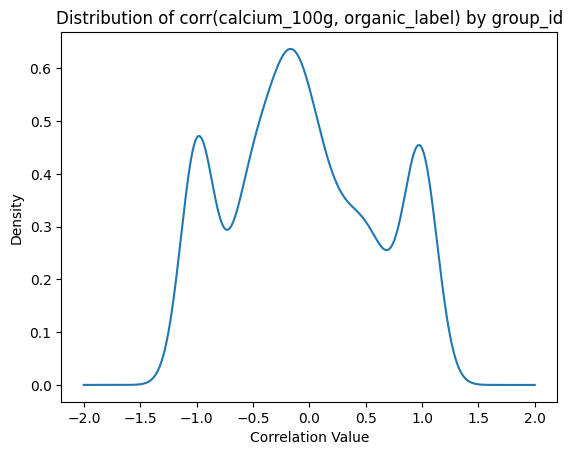

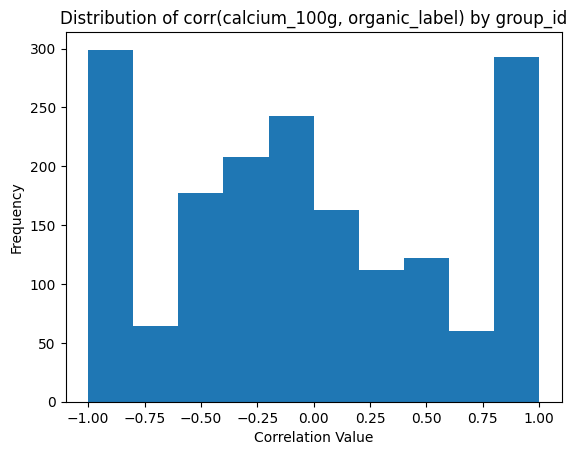




--- corr(iron_100g, organic_label) by group_id ---
Summary Statistics:
count    1882.000000
mean       -0.018034
std         0.673801
min        -1.000000
25%        -0.541058
50%        -0.059368
75%         0.530172
max         1.000000
Name: (iron_100g, organic_label), dtype: float64


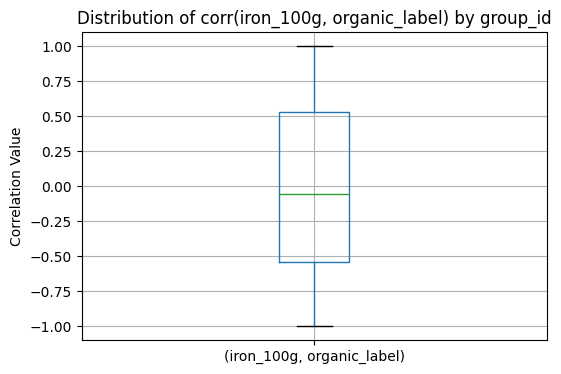

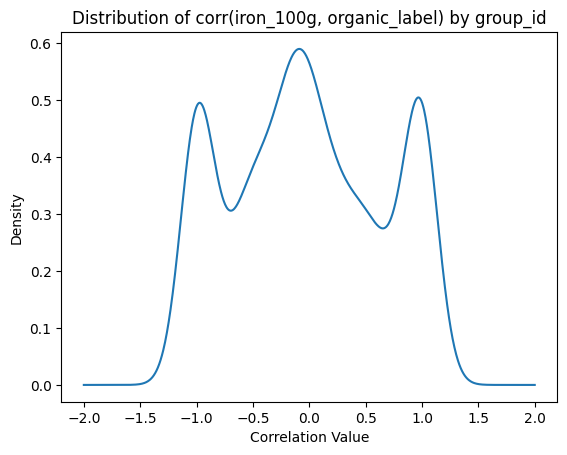

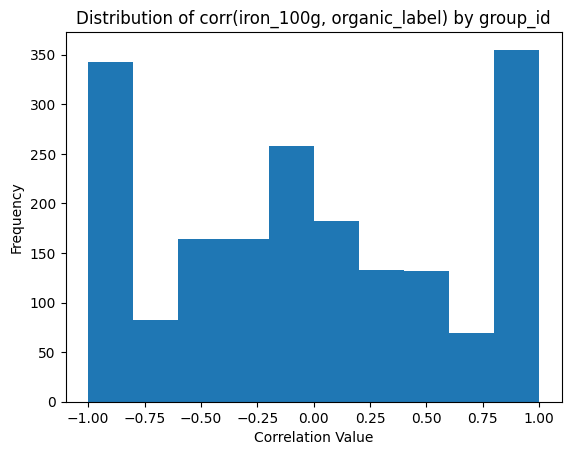

In [ ]:
# All the numeric key columns to analyze
all_ingredient_columns = [
    'additives_n', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g',
    'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin_a_100g',
    'vitamin_c_100g', 'calcium_100g', 'iron_100g'
]

# Initialize an empty dictionary to store the summaries for each ingredient
ingredient_corr_data_dict = {}
ingredient_summaries_dict = {}

for ingredient in all_ingredient_columns:
  print(f"\n--- corr({ingredient}, organic_label) by group_id ---")

  # Dataframe of correlation between ingredient and organic_label by group_id
  df_corr_ingredient_organic_label_by_group = df_EDA_clean.groupby('group_id')\
   [[ingredient, 'organic_label']].corr()\
   .unstack()[[(ingredient, 'organic_label')]].reset_index()

  # Data Series of correlations
  ingredient_corr_data = df_corr_ingredient_organic_label_by_group\
   [(ingredient, 'organic_label')]

  # print stats of correlations
  summary_corr_stats = ingredient_corr_data.describe()
  print("Summary Statistics:")
  print(summary_corr_stats)

  # Store data in dictionaries for later reference
  ingredient_corr_data_dict[ingredient] = ingredient_corr_data
  ingredient_summaries_dict[ingredient] = summary_corr_stats

  # Boxplot to visualize the distribution of the correlation by groups
  plt.figure(figsize=(6, 4))
  df_corr_ingredient_organic_label_by_group.boxplot(column=[(ingredient, 'organic_label')])
  plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
  plt.ylabel('Correlation Value')
  plt.show()

  # Visualize the distribution of the correlations by groups
  ingredient_corr_data.plot.kde()
  plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
  plt.xlabel('Correlation Value')
  plt.show()

  ingredient_corr_data.plot.hist()
  plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
  plt.xlabel('Correlation Value')
  plt.show()

  print('\n')

In [ ]:
# Combine all individual summaries into a single DataFrame
summary_df = pd.DataFrame(ingredient_summaries_dict)
print("\nSummary Table for All Ingredients:")
print(summary_df)


Summary Table for All Ingredients:
       additives_n     fat_100g  saturated_fat_100g  trans_fat_100g  \
count  1217.000000  1761.000000         1351.000000       65.000000   
mean     -0.183546    -0.026645           -0.034909       -0.012428   
std       0.609841     0.672633            0.658710        0.476503   
min      -1.000000    -1.000000           -1.000000       -1.000000   
25%      -0.612372    -0.570425           -0.531163       -0.204492   
50%      -0.215136    -0.050000           -0.072252       -0.093250   
75%       0.142857     0.500000            0.500000       -0.011637   
max       1.000000     1.000000            1.000000        1.000000   

       cholesterol_100g  carbohydrates_100g  sugars_100g   fiber_100g  \
count        748.000000         2115.000000  1982.000000  1701.000000   
mean          -0.050372           -0.037505    -0.061319     0.049297   
std            0.650559            0.674579     0.663592     0.670224   
min           -1.000000         

**Correlation Analysis by Groups for sugars_100g**

In [ ]:
# Check the statistics of correlations by groups for sugars_100g
ingredient = 'sugars_100g'

ingredient_corr_data = ingredient_corr_data_dict[ingredient]
summary_corr_stats = ingredient_summaries_dict[ingredient]

# print stats of correlations
summary_corr_stats = ingredient_corr_data.describe()
print("Summary Statistics:")
print(summary_corr_stats)

Summary Statistics:
count    1982.000000
mean       -0.061319
std         0.663592
min        -1.000000
25%        -0.577350
50%        -0.084465
75%         0.443365
max         1.000000
Name: (sugars_100g, organic_label), dtype: float64


Observation: the mean of correlations by groups is -0.061319, which shows weak negative relationship.

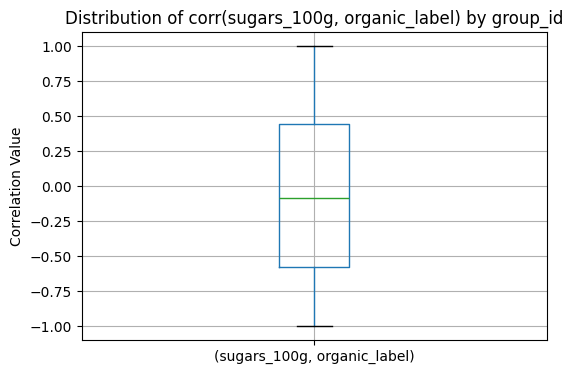

In [ ]:
# Plot boxplot to visualize the distribution of the correlations by groups between sugars_100g and organic_label

df_corr_ingredient_organic_label_by_group = df_EDA_clean.groupby('group_id')\
   [[ingredient, 'organic_label']].corr()\
   .unstack()[[(ingredient, 'organic_label')]].reset_index()

plt.figure(figsize=(6, 4))
df_corr_ingredient_organic_label_by_group.boxplot(column=[(ingredient, 'organic_label')])
plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
plt.ylabel('Correlation Value')
plt.show()

Observation: most of the correlations are between -0.4 to 0.6. The median is slightly below 0 (-0.084465).

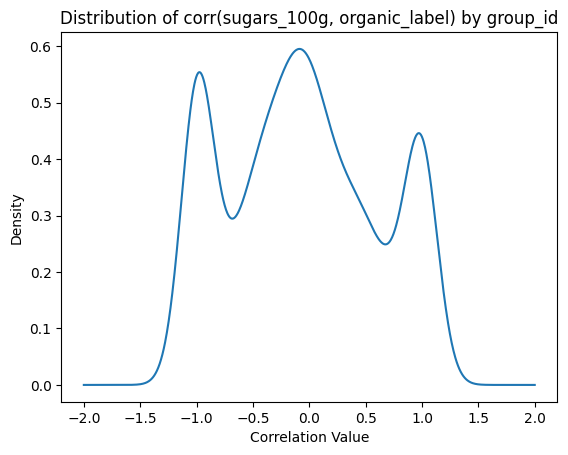

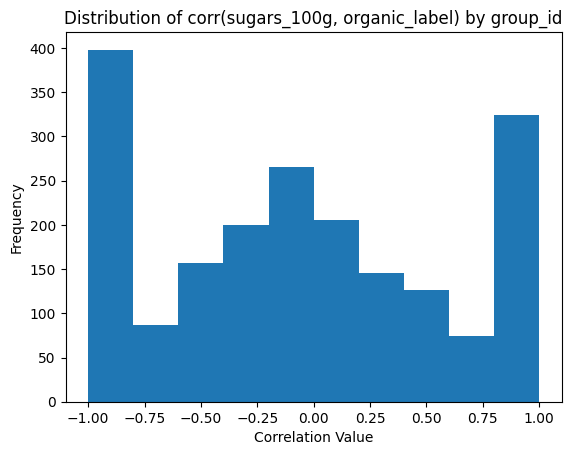

In [ ]:
# Visualize the distribution of the correlations by groups between sugars_100g and organic_label
ingredient_corr_data.plot.kde()
plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
plt.xlabel('Correlation Value')
plt.show()

ingredient_corr_data.plot.hist()
plt.title(f"Distribution of corr({ingredient}, organic_label) by group_id")
plt.xlabel('Correlation Value')
plt.show()

Observation: there is a slight right skewness. The distribution shows mostly symmetric on both sides of 0. It shows that the relationship between sugars_100g and organic_label is a litte towards negative but very weak.

##EDA - Sugar Conclusion

All the EDA results shows that organic products tend to have lower sugar on averge compared to non-organic products. The weak negative correlation also indicates there is a negative relationship between organic products and sugar level.
The results of EDA with grouping show that organic products have a weak negative relationship with sugar level among similar products.

The results of weak relationship can not support organic products really have lower sugars than non-organic products have. The result may be affected by imbalanced data and data amount.  

##Clustering - Sugar and Related Features


In [ ]:
# Read the saved cleaned data from Data Wrangling
df_cleaned = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CIS 5450/Project/cleaned_data_DW_z_score.csv")

In [ ]:
# Check data info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91466 entries, 0 to 91465
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          91466 non-null  object 
 1   ingredients_text      91466 non-null  object 
 2   serving_size          91466 non-null  object 
 3   additives_n           91466 non-null  float64
 4   additives             91461 non-null  object 
 5   additives_en          62159 non-null  object 
 6   nutrition_grade_fr    91466 non-null  object 
 7   energy_100g           91466 non-null  float64
 8   fat_100g              91466 non-null  float64
 9   saturated_fat_100g    91466 non-null  float64
 10  trans_fat_100g        91466 non-null  float64
 11  cholesterol_100g      91466 non-null  float64
 12  carbohydrates_100g    91466 non-null  float64
 13  sugars_100g           91466 non-null  float64
 14  fiber_100g            91466 non-null  float64
 15  proteins_100g      

All columns contains no NaN value except *additives* and *additives_en*

In [ ]:
# Make a copy of the original cleaned data
df_clustering = df_cleaned.copy()

In [ ]:
# Select potential features for clustering
selected_features = [ 'sugars_100g', 'fiber_100g','fat_100g', 'proteins_100g', 'additives_n', 'salt_100g']
data = df_clustering[selected_features]

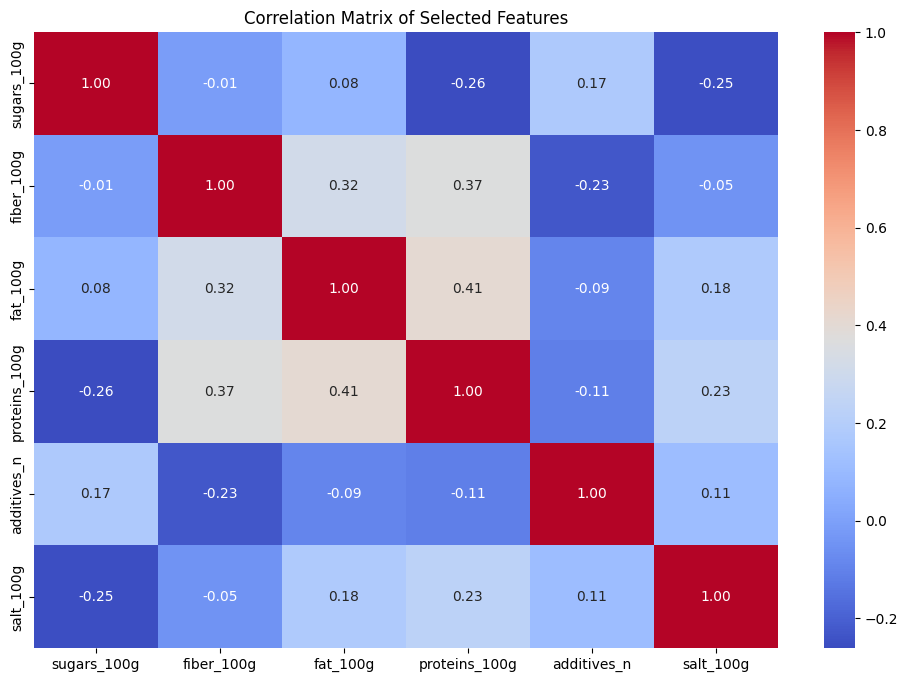

In [ ]:
# Plot correlation heatmap
corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

Observation: Protains has somewhat strong positive correlation with fiber and Fat. Fat also has strong correlation with fiber.  

In [ ]:
# Select features for clustering and create clustering dataframe
features_for_clustering = ['sugars_100g', 'fiber_100g','fat_100g', 'proteins_100g', 'additives_n', 'salt_100g']

df_features_for_clustering = df_clustering[features_for_clustering]

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features_for_clustering)

In [ ]:
# Determine Optimal Number of Clusters

# Range of cluster numbers to test
K_range = range(2, 6)

# Store inertia and silhouette scores for each k
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

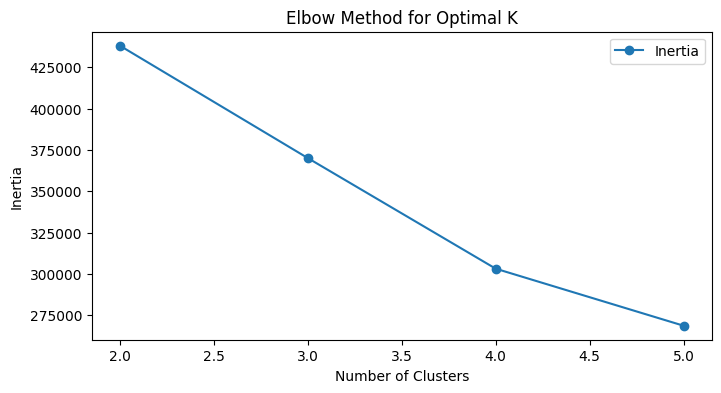

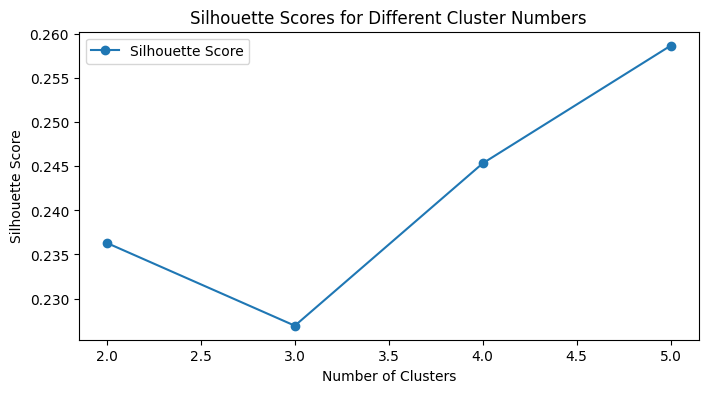

In [ ]:
# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'o-', label='Inertia')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.legend()
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, 'o-', label='Silhouette Score')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Cluster Numbers")
plt.legend()
plt.show()

Choose optimal k:
4 clusters is the best choice because: It strikes a balance between inertia reduction (elbow point) and cluster differentiation.

In [ ]:
# Apply k-means with optimal cluster number
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
# Add the cluster labels to the original DataFrame
df_clustering['cluster'] = clusters

In [ ]:
#Interpret the clusters

# Profile each cluster by calculating the mean values of selected features
cluster_summary = df_clustering.groupby('cluster')[features_for_clustering].mean()
print("Cluster Profiles:\n", cluster_summary)

# Proportion of organic products within each cluster
organic_distribution = df_clustering.groupby('cluster')['organic_label'].mean()
print("Proportion of Organic Products in Each Cluster:\n", organic_distribution)

Cluster Profiles:
          sugars_100g  fiber_100g   fat_100g  proteins_100g  additives_n  \
cluster                                                                   
0           4.510504    1.568426  14.748067      10.317075     2.755876   
1          39.844402    1.754788  13.972090       3.884098     3.168403   
2          12.855769    8.303032  27.978982      14.180896     0.595291   
3           5.883890    1.621378   3.296489       4.054520     1.179497   

         salt_100g  
cluster             
0         1.966256  
1         0.537849  
2         0.718425  
3         0.488943  
Proportion of Organic Products in Each Cluster:
 cluster
0    0.059399
1    0.060102
2    0.237425
3    0.170212
Name: organic_label, dtype: float64


Observations:

Cluster 0: This cluster likely represents low sugar level, median fiber level, above average fat level, high protein level, highly processed products with more additives and fewer organic options.

Cluster 1: This cluster likely represents high sugar level, median fiber level, above average fat level, low protein level, highly processed products with more additives and fewer organic options.

Cluster 2: This cluster likely represents above average sugar level, high fiber level, high fat level, high protein level, low processed products with less additives and more organic options.

Cluster 3: This cluster likely represents low sugar level, median fiber level, low fat level, low protein level, low processed products with less additives and more organic options.

In [ ]:
# Check the statistics of nutrients
df_clustering.describe()

additives_n   energy_100g      fat_100g  saturated_fat_100g  \
count  91466.000000  91466.000000  91466.000000        91466.000000   
mean       1.975018   1152.139877     12.002236            3.831783   
std        2.160366    711.637337     13.292913            4.997969   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.000000    456.000000      1.070000            0.000000   
50%        1.000000   1151.000000      7.140000            1.750000   
75%        3.000000   1715.000000     20.000000            6.250000   
max       10.000000   3289.000000     57.140000           22.860000   

       trans_fat_100g  cholesterol_100g  carbohydrates_100g   sugars_100g  \
count    91466.000000      91466.000000        91466.000000  91466.000000   
mean         0.007423          0.013446           35.842166     14.704144   
std          0.081842          0.023832           26.944888     17.580254   
min          0.000000          0.000000            0.000000      0.000000   
25%          0.000000          0.000000           10.710000      1.890000   
50%          0.000000          0.000000           29.170000      6.250000   
75%          0.000000          0.017000           60.610000     23.530000   
max          1.590000          0.119000          100.000000     72.730000   

         fiber_100g  proteins_100g     salt_100g   sodium_100g  \
count  91466.000000   91466.000000  91466.000000  91466.000000   
mean       2.527946       6.910677      0.897545      0.353364   
std        3.043273       6.287701      0.879944      0.346435   
min        0.000000       0.000000      0.000000      0.000000   
25%        0.000000       2.380000      0.152400      0.060000   
50%        1.600000       5.260000      0.726440      0.286000   
75%        3.600000      10.000000      1.305560      0.514000   
max       15.300000      31.250000      4.572000      1.800000   

       vitamin_a_100g  vitamin_c_100g  calcium_100g     iron_100g  \
count    91466.000000    91466.000000  91466.000000  91466.000000   
mean         0.000073        0.003625      0.059957      0.001463   
std          0.000164        0.009522      0.085949      0.001693   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.031000      0.001060   
75%          0.000088        0.002100      0.088000      0.002320   
max          0.001483        0.086400      0.588000      0.014520   

       organic_label  nutrition_score_100g  nutrition_grade  
count   91466.000000          91466.000000     91466.000000  
mean        0.124964              8.562985         2.904631  
std         0.330680              8.752915         1.317921  
min         0.000000            -10.000000         1.000000  
25%         0.000000              1.000000         2.000000  
50%         0.000000              9.000000         3.000000  
75%         0.000000             15.000000         4.000000  
max         1.000000             34.000000         5.000000

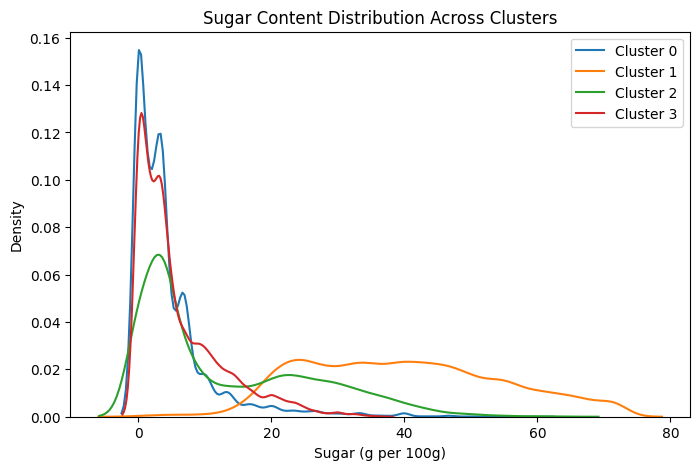

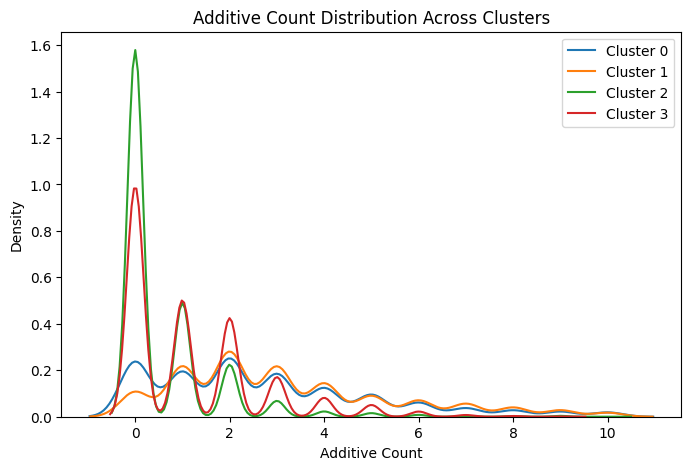

In [ ]:
# Visualize cluster distributions
# Distribution of Sugar Content in Each Cluster
plt.figure(figsize=(8, 5))
for cluster_id in range(optimal_k):
    sns.kdeplot(df_clustering[df_clustering['cluster'] == cluster_id]['sugars_100g'], label=f'Cluster {cluster_id}')
plt.xlabel("Sugar (g per 100g)")
plt.title("Sugar Content Distribution Across Clusters")
plt.legend()
plt.show()

# Distribution of Additive Count in Each Cluster
plt.figure(figsize=(8, 5))
for cluster_id in range(optimal_k):
    sns.kdeplot(df_clustering[df_clustering['cluster'] == cluster_id]['additives_n'], label=f'Cluster {cluster_id}')
plt.xlabel("Additive Count")
plt.title("Additive Count Distribution Across Clusters")
plt.legend()
plt.show()

##Clustering Conclusion

Cluster 3 and 4 have higher portion of organic products with low additives and low to average sugar level. The result on some level can show that organic food tend to be less processed and have less sugar level. However, the protion of organic food is low due to the imbalance of data. Thus, the conclusion is not certain.